In [11]:
seed=1
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['PYTHONHASHSEED']=str(seed)
import numpy as np
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense ,Input,concatenate ,Conv2D,Conv2DTranspose,\
MaxPooling2D,AveragePooling2D, LSTM ,Reshape, TimeDistributed,ReLU, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
import warnings
import glob
import math
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import pickle
from collections import deque
from tqdm import tqdm,trange
import gym
from copy import copy , deepcopy
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

  0%|                                                                                         | 0/2010 [00:00<?, ?it/s]


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



  2%|█▉                                                                             | 48/2010 [00:00<00:04, 452.22it/s]

episode : 0 reward : 1.2897102799144187
total test reward=-20.968053000940774


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 499.57it/s]

episode : 1 reward : -0.6288668723422852
total test reward=-18.780709801987683


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.57it/s]

episode : 2 reward : -1.0629153609754765
total test reward=-18.373203781987236


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 468.17it/s]

episode : 3 reward : -2.562671171736416
total test reward=-18.853496081383156


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 464.57it/s]

episode : 4 reward : -3.2842707766633525
total test reward=-20.211933489617458


  4%|███▌                                                                           | 90/2010 [00:00<00:04, 446.88it/s]

episode : 5 reward : -7.997718637803821
total test reward=-25.5126894339774


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.73it/s]

episode : 6 reward : -0.5763867847651576
total test reward=-20.186781975167992


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.83it/s]

episode : 7 reward : 0.21505527348713427
total test reward=-5.012989703769228


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 8 reward : 0.5651424358393773
total test reward=4.610428409344996


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.19it/s]

episode : 9 reward : 0.26467812617153275
total test reward=4.671211946189327


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 441.81it/s]

episode : 10 reward : -1.1630711675430512
total test reward=-20.63271616226215


  2%|█▌                                                                             | 39/2010 [00:00<00:05, 378.68it/s]

episode : 11 reward : 1.9515764890388199
total test reward=3.8648597539936502


  2%|█▌                                                                             | 40/2010 [00:00<00:04, 397.11it/s]

episode : 12 reward : 0.9838103655851178
total test reward=4.858576206041812


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 432.39it/s]

episode : 13 reward : -6.794365422690919
total test reward=4.086474931074771


  2%|█▌                                                                             | 39/2010 [00:00<00:05, 379.88it/s]

episode : 14 reward : -0.3462586580172313
total test reward=4.389179363131401


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.65it/s]

episode : 15 reward : 0.9116658288693387
total test reward=4.463411242908946


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 412.86it/s]

episode : 16 reward : 1.0667126730673249
total test reward=4.367018313895901


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.74it/s]

episode : 17 reward : -2.606931502358213
total test reward=-23.270871741063388


  3%|██                                                                             | 52/2010 [00:00<00:04, 471.55it/s]

episode : 18 reward : -2.511541223786766
total test reward=-19.224887734791253


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 19 reward : 1.4424803921578189
total test reward=-1.5358779194100578


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 20 reward : -3.1775312421977464
total test reward=4.95425305058964


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 21 reward : -3.539702083525034
total test reward=3.894047629893321


  4%|███▏                                                                           | 82/2010 [00:00<00:04, 401.85it/s]

episode : 22 reward : -2.945452285265595
total test reward=-26.690794405152786


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 432.53it/s]

episode : 23 reward : 0.7200878801245185
total test reward=-17.411700813648164


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 24 reward : -2.954379137517533
total test reward=-0.33599136414648084


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 415.57it/s]

episode : 25 reward : -0.4256462230038869
total test reward=-0.07028352496755437


  2%|█▌                                                                             | 39/2010 [00:00<00:05, 382.32it/s]

episode : 26 reward : -1.4064405956078148
total test reward=-0.10316384456789204


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 432.37it/s]

episode : 27 reward : 0.23178885428285634
total test reward=-0.45264763275858205


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 434.36it/s]

episode : 28 reward : -1.1347821486105805
total test reward=-0.45884188146156574


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 447.80it/s]

episode : 29 reward : -1.5007006519251527
total test reward=-0.5331566664289991


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.53it/s]

episode : 30 reward : -2.446393655789357
total test reward=-0.3794472646666886


  2%|█▌                                                                             | 41/2010 [00:00<00:05, 379.01it/s]

episode : 31 reward : 0.9349188378753523
total test reward=-0.26351569688462134


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.85it/s]

episode : 32 reward : -2.048797104550309
total test reward=-0.3374475629146199


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.74it/s]

episode : 33 reward : -0.6935671411059745
total test reward=-0.2602384564057837


  2%|█▍                                                                             | 38/2010 [00:00<00:05, 374.81it/s]

episode : 34 reward : -2.095416869743564
total test reward=-0.35358150473233996


  4%|███▍                                                                           | 86/2010 [00:00<00:04, 414.27it/s]

episode : 35 reward : -0.15449375839757584
total test reward=-0.3629617783522713


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 407.77it/s]

episode : 36 reward : 1.5920717852823518
total test reward=-0.37895311852768143


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 408.73it/s]

episode : 37 reward : -2.8329637862158
total test reward=-0.022395011394570608


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.51it/s]

episode : 38 reward : -1.3539250226281339
total test reward=0.8924183614097758


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 467.10it/s]

episode : 39 reward : 0.06652443374528882
total test reward=3.0967386215657493


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 438.45it/s]

episode : 40 reward : 0.384586200296265
total test reward=3.7103882657525014


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.81it/s]

episode : 41 reward : -1.418007176641197
total test reward=3.2484624091676424


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 418.09it/s]

episode : 42 reward : -0.09639099377938054
total test reward=3.539321110988704


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.73it/s]

episode : 43 reward : 0.9438098771010415
total test reward=3.4815138815353803


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.15it/s]

episode : 44 reward : 1.7310693987170116
total test reward=2.9844983938877485


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.88it/s]

episode : 45 reward : -2.776472678098406
total test reward=2.308162244188041


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 46 reward : -0.6438351522518135
total test reward=2.5226906637815185


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 47 reward : 1.599742081871165
total test reward=2.1519245869702965


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 428.33it/s]

episode : 48 reward : 0.8408105478257757
total test reward=2.53761021261604


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 479.97it/s]

episode : 49 reward : 1.5012984908340052
total test reward=3.01156428029087


  5%|███▊                                                                           | 96/2010 [00:00<00:03, 478.85it/s]

episode : 50 reward : -1.0788932100538504
total test reward=3.47765327958903


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 449.88it/s]

episode : 51 reward : 0.8753700594361509
total test reward=3.491892998113461


  2%|█▌                                                                             | 39/2010 [00:00<00:05, 380.04it/s]

episode : 52 reward : 3.5164299561081167
total test reward=3.7617593511027216


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 449.57it/s]

episode : 53 reward : 1.649083446495419
total test reward=2.8395456662565186


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 403.00it/s]

episode : 54 reward : -1.9589380925846465
total test reward=3.7157702773639314


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 415.65it/s]

episode : 55 reward : 0.15189888132577067
total test reward=3.7456335649834513


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.45it/s]

episode : 56 reward : -18.4048078311348
total test reward=3.71798703198919


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.80it/s]

episode : 57 reward : 0.8694178621618618
total test reward=5.187845544215788


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 453.56it/s]

episode : 58 reward : 1.5289857027370903
total test reward=3.853513378470841


  2%|█▋                                                                             | 43/2010 [00:00<00:05, 386.18it/s]

episode : 59 reward : -2.153717891869789
total test reward=7.119271105611531


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 424.43it/s]

episode : 60 reward : 3.1190432209493517
total test reward=8.185670946589488


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 484.53it/s]

episode : 61 reward : 1.592979465798869
total test reward=8.905665504396298


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 62 reward : 3.1244050075525074
total test reward=8.724186448288188


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.09it/s]

episode : 63 reward : 4.513848020198281
total test reward=10.0260078686114


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.60it/s]

episode : 64 reward : 0.5594272842099746
total test reward=10.784817964116758


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.18it/s]

episode : 65 reward : -48.139716879812326
total test reward=10.645728556555943


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.45it/s]

episode : 66 reward : 8.391838752407766
total test reward=9.985521283111852


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.52it/s]

episode : 67 reward : 3.130291705328977
total test reward=12.995527169660921


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.70it/s]

episode : 68 reward : 3.7931676585735215
total test reward=12.626331274399377


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.59it/s]

episode : 69 reward : 0.9263506498923024
total test reward=12.823018177581407


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 460.83it/s]

episode : 70 reward : 3.709770457806906
total test reward=12.15139596749895


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 461.87it/s]

episode : 71 reward : 3.0122169076902097
total test reward=10.953753828388292


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 471.63it/s]

episode : 72 reward : 4.542170011100724
total test reward=11.424693098009909


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 428.86it/s]

episode : 73 reward : 4.5467086318841945
total test reward=11.110679079762381


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 422.70it/s]

episode : 74 reward : -44.55896173570385
total test reward=10.50512622921815


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.74it/s]

episode : 75 reward : 5.762919863583288
total test reward=11.004009845530721


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 439.31it/s]

episode : 76 reward : 5.456836962422061
total test reward=10.668921394612447


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 470.05it/s]

episode : 77 reward : 0.5402386691304679
total test reward=10.020059059817575


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 454.30it/s]

episode : 78 reward : 0.6025381118321569
total test reward=10.60374371696073


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.36it/s]

episode : 79 reward : 7.595681274854458
total test reward=11.006557162444754


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.18it/s]

episode : 80 reward : 7.103482065605897
total test reward=6.779337442860189


  5%|███▋                                                                           | 94/2010 [00:00<00:04, 465.32it/s]

episode : 81 reward : 3.0893146116902566
total test reward=7.649648008742093


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 457.78it/s]

episode : 82 reward : 4.739073278724037
total test reward=11.638490511402507


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 422.84it/s]

episode : 83 reward : 10.708997414438103
total test reward=12.548646866725658


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 84 reward : 6.837990014459756
total test reward=12.470653047785143


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 409.49it/s]

episode : 85 reward : 7.827794606619266
total test reward=-22.64807389157583


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 423.57it/s]

episode : 86 reward : 5.950350887708914
total test reward=-16.038965053919867


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.26it/s]

episode : 87 reward : 4.834234120597536
total test reward=10.809637474839883


  5%|███▌                                                                           | 92/2010 [00:00<00:04, 462.31it/s]

episode : 88 reward : -9.134125991187487
total test reward=5.821186681993943


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.54it/s]

episode : 89 reward : 6.4506685388015
total test reward=12.107378872414234


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 408.01it/s]

episode : 90 reward : 3.745000083326251
total test reward=14.132972296883773


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.17it/s]

episode : 91 reward : 3.8904223272677436
total test reward=13.218087011973063


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.87it/s]

episode : 92 reward : 8.198575170090189
total test reward=12.706039061544676


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 422.86it/s]

episode : 93 reward : 5.5156707858531036
total test reward=12.359476371769807


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 436.02it/s]

episode : 94 reward : 5.714063429864075
total test reward=11.33175853281906


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 431.16it/s]

episode : 95 reward : 9.849007344516117
total test reward=11.296576519767017


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 422.83it/s]

episode : 96 reward : 12.148786404545326
total test reward=12.21527253573042


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 472.00it/s]

episode : 97 reward : 6.351825919282218
total test reward=12.938769744620416


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 472.06it/s]

episode : 98 reward : 8.917441418164758
total test reward=12.619997442026941


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 470.21it/s]

episode : 99 reward : 9.345664116413216
total test reward=7.4605388644453825


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.37it/s]

episode : 100 reward : 8.056109383994299
total test reward=-3.528749622188001


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 457.53it/s]

episode : 101 reward : 6.801233599911104
total test reward=12.976838302022676


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 432.10it/s]

episode : 102 reward : 8.715653915439557
total test reward=12.655255702955099


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 464.65it/s]

episode : 103 reward : 9.426131402345945
total test reward=13.336046268071602


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.67it/s]

episode : 104 reward : 11.275102764721103
total test reward=13.351705082036489


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.30it/s]

episode : 105 reward : 7.851383850550697
total test reward=13.622570230455437


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 467.26it/s]

episode : 106 reward : 8.596501288721575
total test reward=12.796611140672209


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 107 reward : 10.641465041346624
total test reward=14.812233544910319


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 421.82it/s]

episode : 108 reward : 10.141496176216922
total test reward=14.97959892846907


  3%|██                                                                             | 52/2010 [00:00<00:04, 472.11it/s]

episode : 109 reward : 13.744721986783334
total test reward=1.011201577921673


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 425.21it/s]

episode : 110 reward : 9.240898941611624
total test reward=1.1145310696691595


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 446.85it/s]

episode : 111 reward : 20.874508596324798
total test reward=1.5738057771623637


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.59it/s]

episode : 112 reward : 10.385938528659477
total test reward=5.676818887305222


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 448.19it/s]

episode : 113 reward : 11.81408728844327
total test reward=-21.702689774374875


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.18it/s]

episode : 114 reward : 14.336295707759085
total test reward=-21.509502029834113


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.52it/s]

episode : 115 reward : 8.896897199479554
total test reward=39.486308583953914


  3%|██                                                                             | 52/2010 [00:00<00:04, 480.86it/s]

episode : 116 reward : 25.881629730410886
total test reward=65.71009954353605


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 399.97it/s]

episode : 117 reward : 4.005236241225462
total test reward=58.66666479781772


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.45it/s]

episode : 118 reward : 15.139776620251546
total test reward=17.75865620573039


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 447.42it/s]

episode : 119 reward : 7.059929433197853
total test reward=54.80360966705147


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.45it/s]

episode : 120 reward : 37.49450892478278
total test reward=29.61347445857644


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 418.65it/s]

episode : 121 reward : 17.652255409617656
total test reward=80.98594540022873


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 460.01it/s]

episode : 122 reward : 20.487067645806942
total test reward=80.53243582653721


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 413.03it/s]

episode : 123 reward : 12.650833734343562
total test reward=42.426941364618756


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 503.69it/s]

episode : 124 reward : 11.471287161675901
total test reward=44.0948703539647


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.16it/s]

episode : 125 reward : 14.886330838366295
total test reward=53.042769791504


  3%|██▎                                                                            | 60/2010 [00:00<00:03, 525.73it/s]

episode : 126 reward : 12.714890442783632
total test reward=41.47210059521329


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 478.91it/s]

episode : 127 reward : 13.478243018332646
total test reward=59.33564813553515


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 450.23it/s]

episode : 128 reward : 6.49814783956824
total test reward=78.297282550985


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.45it/s]

episode : 129 reward : 10.315336690034586
total test reward=50.39948979441051


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 445.77it/s]

episode : 130 reward : 19.061084632007898
total test reward=100.1132196610566


  2%|█▋                                                                             | 43/2010 [00:00<00:05, 379.69it/s]

episode : 131 reward : 14.065994841747358
total test reward=88.03606226420149


  3%|██▏                                                                            | 55/2010 [00:00<00:04, 477.93it/s]

episode : 132 reward : 10.357336215829681
total test reward=66.08262140726575


  5%|███▊                                                                           | 98/2010 [00:00<00:04, 463.16it/s]

episode : 133 reward : 20.567752038169644
total test reward=72.6299216570233


  3%|██                                                                             | 52/2010 [00:00<00:04, 474.86it/s]

episode : 134 reward : 13.772461745125405
total test reward=84.59674107869276


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 455.47it/s]

episode : 135 reward : 16.831256858600494
total test reward=43.611837619444316


  3%|██                                                                             | 53/2010 [00:00<00:03, 520.84it/s]

episode : 136 reward : 24.385790304307406
total test reward=20.061074945511823


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 493.15it/s]

episode : 137 reward : 26.016253140060666
total test reward=24.417317074264123


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 138 reward : 11.89749289023855
total test reward=14.205597787608104


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 454.08it/s]

episode : 139 reward : 14.645975385793104
total test reward=22.528626108808858


  5%|███▊                                                                           | 98/2010 [00:00<00:04, 462.05it/s]

episode : 140 reward : 13.613724445474366
total test reward=29.257801644446396


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 416.99it/s]

episode : 141 reward : 10.325059980581793
total test reward=35.38585068295027


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 540.66it/s]

episode : 142 reward : 22.41797858485135
total test reward=20.2459613202517


  3%|██                                                                             | 51/2010 [00:00<00:04, 486.85it/s]

episode : 143 reward : 27.657582244527813
total test reward=34.50877653650183


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 464.32it/s]

episode : 144 reward : 18.35667112306089
total test reward=31.532568154740737


  3%|██                                                                             | 54/2010 [00:00<00:04, 471.36it/s]

episode : 145 reward : 12.354395250437351
total test reward=33.943605718850456


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.27it/s]

episode : 146 reward : -7.615612174293608
total test reward=32.00677583931431


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 492.93it/s]

episode : 147 reward : 22.383413586080067
total test reward=38.31768198424764


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 490.49it/s]

episode : 148 reward : 11.561553303094946
total test reward=47.87706918866791


  3%|██                                                                             | 53/2010 [00:00<00:04, 481.03it/s]

episode : 149 reward : 9.79931101542448
total test reward=34.379991050287536


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 453.44it/s]

episode : 150 reward : 23.03419026447998
total test reward=47.44113732073703


  5%|███▌                                                                           | 91/2010 [00:00<00:04, 435.11it/s]

episode : 151 reward : 29.24712705042685
total test reward=62.56475434301873


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 473.17it/s]

episode : 152 reward : -3.1039291278530325
total test reward=37.46536076623703


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.16it/s]

episode : 153 reward : 18.01130534509245
total test reward=45.48338897160659


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 418.18it/s]

episode : 154 reward : 11.065524454707859
total test reward=63.65959378105877


  5%|███▋                                                                           | 95/2010 [00:00<00:04, 473.85it/s]

episode : 155 reward : 23.260539838424744
total test reward=40.65092530901172


  5%|███▉                                                                          | 100/2010 [00:00<00:03, 485.84it/s]

episode : 156 reward : 35.040740856719715
total test reward=73.52639516821849


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.29it/s]

episode : 157 reward : 35.012088747789186
total test reward=81.58051744860437


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.53it/s]

episode : 158 reward : 20.946895786393572
total test reward=35.93196532110406


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.35it/s]

episode : 159 reward : 12.538572857117144
total test reward=74.59444309340941


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.23it/s]

episode : 160 reward : 18.475072510376634
total test reward=33.120920843585466


  3%|██                                                                             | 51/2010 [00:00<00:03, 496.45it/s]

episode : 161 reward : 20.44467416643385
total test reward=55.80300676165731


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 430.93it/s]

episode : 162 reward : 31.086125468996563
total test reward=45.190538579983965


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.52it/s]

episode : 163 reward : 47.68189629626027
total test reward=51.97664334380769


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 416.08it/s]

episode : 164 reward : 27.970144335472586
total test reward=33.05632342915546


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 422.70it/s]

episode : 165 reward : 14.16840167405028
total test reward=33.24027176281203


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.35it/s]

episode : 166 reward : 13.590369170873036
total test reward=30.385418631423256


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 459.26it/s]

episode : 167 reward : 22.55437949455902
total test reward=21.000189533264013


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.73it/s]

episode : 168 reward : 29.28921922606345
total test reward=31.68550495520747


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 444.69it/s]

episode : 169 reward : 3.6774740568492765
total test reward=26.546610714203286


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.34it/s]

episode : 170 reward : 24.16643530284534
total test reward=32.19943157707219


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.34it/s]

episode : 171 reward : 23.377245399474642
total test reward=27.61140685617703


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 405.59it/s]

episode : 172 reward : 41.267313079400836
total test reward=32.29202369910293


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.35it/s]

episode : 173 reward : 15.959435685952812
total test reward=45.45855202598882


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 469.45it/s]

episode : 174 reward : 9.885466565367572
total test reward=47.73778266550766


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.45it/s]

episode : 175 reward : 67.21424773147314
total test reward=43.03118069853467


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.43it/s]

episode : 176 reward : 19.45868814223427
total test reward=33.15369348364211


  5%|███▋                                                                           | 95/2010 [00:00<00:04, 462.21it/s]

episode : 177 reward : 56.72321618661155
total test reward=59.44044173219762


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 442.05it/s]

episode : 178 reward : 34.12492977867257
total test reward=72.25074612612107


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.04it/s]

episode : 179 reward : 23.997195934553908
total test reward=72.33343113637605


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 433.43it/s]

episode : 180 reward : 14.407482999047936
total test reward=49.89722977225655


  5%|███▋                                                                           | 94/2010 [00:00<00:04, 462.45it/s]

episode : 181 reward : 20.521498422860088
total test reward=70.42291529397656


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 461.97it/s]

episode : 182 reward : 23.889594322437222
total test reward=95.65860685771591


  4%|███▌                                                                           | 90/2010 [00:00<00:04, 437.11it/s]

episode : 183 reward : 15.978887947385576
total test reward=63.05432630463433


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.38it/s]

episode : 184 reward : 28.777032973970158
total test reward=120.14003786057519


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 185 reward : 20.700888183316764
total test reward=132.84541390562623


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 432.54it/s]

episode : 186 reward : 40.54886457613059
total test reward=74.96866760781067


  3%|██                                                                             | 51/2010 [00:00<00:04, 451.48it/s]

episode : 187 reward : 13.816917026562683
total test reward=105.39656991286499


  4%|███▌                                                                           | 90/2010 [00:00<00:04, 412.65it/s]

episode : 188 reward : 36.025709800869826
total test reward=91.47775495633518


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.56it/s]

episode : 189 reward : 38.26563129387744
total test reward=188.14574578446727


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.01it/s]

episode : 190 reward : 89.87038481220382
total test reward=151.37797277279478


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.67it/s]

episode : 191 reward : 63.953818132095165
total test reward=76.61420301286955


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.21it/s]

episode : 192 reward : 60.49978000781968
total test reward=153.83601503750924


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.22it/s]

episode : 193 reward : 27.728208333031546
total test reward=72.70261122429284


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.37it/s]

episode : 194 reward : 11.970294714891757
total test reward=90.99527078618945


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 445.15it/s]

episode : 195 reward : 81.8162554421526
total test reward=93.13083353437386


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 196 reward : 46.1824714497599
total test reward=112.8383884726317


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.32it/s]

episode : 197 reward : 33.569719338109564
total test reward=57.87252992537416


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.67it/s]

episode : 198 reward : 36.52943728658353
total test reward=50.42983872275316


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.67it/s]

episode : 199 reward : 33.34939828899246
total test reward=61.81350004200711


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 418.42it/s]

episode : 200 reward : 47.718448997888856
total test reward=131.72748850569093


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.62it/s]

episode : 201 reward : 27.801890148717728
total test reward=75.63665509500404


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.87it/s]

episode : 202 reward : 39.442491498431565
total test reward=89.80093318284199


  3%|██                                                                             | 52/2010 [00:00<00:04, 470.62it/s]

episode : 203 reward : 31.491460529195244
total test reward=78.26375548926471


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 437.93it/s]

episode : 204 reward : 34.425420005798436
total test reward=99.94953056625974


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.19it/s]

episode : 205 reward : 41.32358866204919
total test reward=85.32313772344978


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.18it/s]

episode : 206 reward : 18.639332810619557
total test reward=92.88704366214972


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 207 reward : 52.51970747569006
total test reward=107.39698802025275


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.60it/s]

episode : 208 reward : 23.85274145256099
total test reward=79.73587786593598


  3%|██                                                                             | 54/2010 [00:00<00:04, 479.62it/s]

episode : 209 reward : 24.485331078735783
total test reward=56.34887488612164


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.22it/s]

episode : 210 reward : 26.873318354935332
total test reward=158.7187067174535


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.37it/s]

episode : 211 reward : 13.242123680910993
total test reward=191.24556904854117


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 429.34it/s]

episode : 212 reward : 59.26993648714335
total test reward=99.88062932349902


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.59it/s]

episode : 213 reward : 44.66689725685068
total test reward=124.59250484755361


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.67it/s]

episode : 214 reward : 16.582122963334125
total test reward=75.76256159795471


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 458.87it/s]

episode : 215 reward : 37.627799095656265
total test reward=95.59785746256269


  2%|█▌                                                                             | 41/2010 [00:00<00:05, 388.12it/s]

episode : 216 reward : 55.27695420706301
total test reward=136.67735070073167


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.22it/s]

episode : 217 reward : 132.3874011163463
total test reward=37.507000000488176


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 500.89it/s]

episode : 218 reward : 42.27297689819396
total test reward=47.07137808426744


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 464.50it/s]

episode : 219 reward : 31.10146876565681
total test reward=34.65631266243764


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 460.65it/s]

episode : 220 reward : 10.258805509432095
total test reward=87.21867540053019


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.37it/s]

episode : 221 reward : 27.458311605859265
total test reward=46.751767616342065


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 447.66it/s]

episode : 222 reward : 57.02562501001312
total test reward=68.20031770945074


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.43it/s]

episode : 223 reward : 41.62389933886523
total test reward=119.46580632516842


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 452.59it/s]

episode : 224 reward : 24.86482693192582
total test reward=39.1305633366502


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.36it/s]

episode : 225 reward : 84.78731188414001
total test reward=89.74134732467033


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.50it/s]

episode : 226 reward : 46.09255089123185
total test reward=51.04863102710586


  3%|██                                                                             | 52/2010 [00:00<00:04, 449.99it/s]

episode : 227 reward : 93.8359945111789
total test reward=102.60243828719231


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 434.75it/s]

episode : 228 reward : 37.517111373850376
total test reward=88.51464807694646


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 402.53it/s]

episode : 229 reward : 11.671162557823926
total test reward=51.18008681051199


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.33it/s]

episode : 230 reward : 38.89249216773088
total test reward=134.8852689246849


  4%|███▎                                                                           | 84/2010 [00:00<00:04, 412.56it/s]

episode : 231 reward : 45.737278070280865
total test reward=21.655291935876583


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.44it/s]

episode : 232 reward : 58.55371675953348
total test reward=84.39582902557665


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 415.81it/s]

episode : 233 reward : 23.844904338822182
total test reward=99.77641962127716


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.60it/s]

episode : 234 reward : 153.91432616009982
total test reward=61.908688874412086


  4%|███▍                                                                           | 89/2010 [00:00<00:04, 442.00it/s]

episode : 235 reward : 45.43950539431974
total test reward=56.0497526929585


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.01it/s]

episode : 236 reward : 29.792671553158467
total test reward=59.66703826405048


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.59it/s]

episode : 237 reward : 37.342380962291095
total test reward=94.788588527808


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.24it/s]

episode : 238 reward : 32.211200038733594
total test reward=31.491367398017083


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 239 reward : 0.04974993630624702
total test reward=133.51808450233116


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 428.80it/s]

episode : 240 reward : 62.19826733472097
total test reward=47.5005042045136


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.66it/s]

episode : 241 reward : -2.604056658473627
total test reward=69.10491387365545


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 458.46it/s]

episode : 242 reward : 15.262954043260844
total test reward=73.95547582174058


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 461.86it/s]

episode : 243 reward : 26.9777425803115
total test reward=80.65374126627097


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.73it/s]

episode : 244 reward : 45.98991457407386
total test reward=8.386821556813853


  3%|██                                                                             | 51/2010 [00:00<00:04, 474.26it/s]

episode : 245 reward : 97.01954065787295
total test reward=-1.715627356868228


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 246 reward : 26.503626402193003
total test reward=43.49207948972138


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.89it/s]

episode : 247 reward : 109.87207179478352
total test reward=75.51458618946364


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.53it/s]

episode : 248 reward : 22.694982375091335
total test reward=44.5605679302527


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 428.10it/s]

episode : 249 reward : 22.4675333482082
total test reward=37.067855720643415


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 412.61it/s]

episode : 250 reward : 37.8407082231018
total test reward=1.1758918340181472


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.45it/s]

episode : 251 reward : 49.14671444407164
total test reward=2.3101393359796027


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.30it/s]

episode : 252 reward : 26.35925657572066
total test reward=1.0026856024768436


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 447.71it/s]

episode : 253 reward : 51.00944330775704
total test reward=56.12543900021793


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 254 reward : 60.263206127494925
total test reward=-0.49864426855708927


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 255 reward : 29.594513328944508
total test reward=41.50070209949213


  3%|██                                                                             | 51/2010 [00:00<00:04, 469.86it/s]

episode : 256 reward : 136.354046042982
total test reward=20.80181547513642


  3%|██                                                                             | 52/2010 [00:00<00:03, 503.42it/s]

episode : 257 reward : 52.32547373231823
total test reward=23.90004240885139


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 468.68it/s]

episode : 258 reward : 69.84898426111866
total test reward=5.996455406708952


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 438.91it/s]

episode : 259 reward : 15.204419652458348
total test reward=39.47301795511026


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.69it/s]

episode : 260 reward : 71.54186389929757
total test reward=-2.08738199836216


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 507.58it/s]

episode : 261 reward : 86.3226171060563
total test reward=-4.527359394910269


  3%|██                                                                             | 52/2010 [00:00<00:04, 455.76it/s]

episode : 262 reward : 288.2767992616965
total test reward=28.185767929444


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 444.26it/s]

episode : 263 reward : 109.45147451639093
total test reward=24.401295948834456


  5%|███▉                                                                          | 103/2010 [00:00<00:03, 494.32it/s]

episode : 264 reward : 65.97039807100201
total test reward=-1.1271651857808904


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 439.71it/s]

episode : 265 reward : 55.90122548665878
total test reward=-0.816945933971802


  3%|██                                                                             | 52/2010 [00:00<00:03, 501.18it/s]

episode : 266 reward : 83.47573375621877
total test reward=65.69303227827666


  3%|██                                                                             | 54/2010 [00:00<00:03, 506.56it/s]

episode : 267 reward : 57.14002831079726
total test reward=-1.0855300512186168


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 433.59it/s]

episode : 268 reward : 91.58255021220403
total test reward=62.28575012982837


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.51it/s]

episode : 269 reward : 151.26776876094866
total test reward=13.280223130561367


  3%|██                                                                             | 51/2010 [00:00<00:04, 485.02it/s]

episode : 270 reward : 46.26920719775023
total test reward=10.95854577150806


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.31it/s]

episode : 271 reward : 43.0718668125658
total test reward=3.904896822998958


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 435.37it/s]

episode : 272 reward : 40.23425431139814
total test reward=2.6244463298440808


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 447.10it/s]

episode : 273 reward : 42.66326632580117
total test reward=81.98367980098439


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.24it/s]

episode : 274 reward : 69.80139652503442
total test reward=40.86992570803789


  3%|██                                                                             | 51/2010 [00:00<00:04, 470.35it/s]

episode : 275 reward : 73.46332391861202
total test reward=21.857527457589534


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 459.44it/s]

episode : 276 reward : 111.79181033288187
total test reward=-2.664930348346581


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 426.36it/s]

episode : 277 reward : 79.50872992470474
total test reward=57.759174630237474


  2%|█▍                                                                             | 38/2010 [00:00<00:05, 376.73it/s]

episode : 278 reward : 26.476632706809216
total test reward=58.75273231220117


  3%|██                                                                             | 52/2010 [00:00<00:03, 513.89it/s]

episode : 279 reward : 74.47494430214226
total test reward=143.2500482451959


  3%|██                                                                             | 52/2010 [00:00<00:03, 517.61it/s]

episode : 280 reward : 26.305466122184296
total test reward=67.8588523209303


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 477.05it/s]

episode : 281 reward : 68.91030096477778
total test reward=46.458883904208456


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 487.29it/s]

episode : 282 reward : 75.88579208164204
total test reward=35.42752214695833


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 507.78it/s]

episode : 283 reward : 28.995283499306915
total test reward=39.15159941296133


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 419.69it/s]

episode : 284 reward : 129.64868346373754
total test reward=40.34084683404011


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.34it/s]

episode : 285 reward : 42.01449498290037
total test reward=20.781703821179434


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 454.14it/s]

episode : 286 reward : 13.060469723992737
total test reward=3.933765707023592


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 457.42it/s]

episode : 287 reward : 33.71520253755104
total test reward=2.5102954372133377


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 456.18it/s]

episode : 288 reward : 69.74730560635135
total test reward=130.5107099921442


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.67it/s]

episode : 289 reward : 49.75062711990465
total test reward=23.86695948278409


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.45it/s]

episode : 290 reward : 22.416746914339218
total test reward=41.90860584165506


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.67it/s]

episode : 291 reward : 27.666277648758506
total test reward=6.805511619559999


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 546.02it/s]

episode : 292 reward : 62.161526899896074
total test reward=7.613853985964636


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.70it/s]

episode : 293 reward : 83.3985046411727
total test reward=3.4664024176902957


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.34it/s]

episode : 294 reward : 72.10513745379035
total test reward=7.4139088825721355


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 472.54it/s]

episode : 295 reward : 47.07281943716319
total test reward=3.0632076993816253


  3%|██                                                                             | 53/2010 [00:00<00:04, 480.89it/s]

episode : 296 reward : 57.13475973528713
total test reward=5.075183579365492


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 484.93it/s]

episode : 297 reward : 46.15893155407222
total test reward=2.241602196885506


  3%|██                                                                             | 54/2010 [00:00<00:04, 479.35it/s]

episode : 298 reward : 10.367803794274941
total test reward=2.3593492870716366


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 427.56it/s]

episode : 299 reward : 45.10912256520733
total test reward=140.0386520751062


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 445.97it/s]

episode : 300 reward : 46.72420597659059
total test reward=51.62677026284613


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 301 reward : 84.3359526807087
total test reward=65.88862220327891


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.74it/s]

episode : 302 reward : 25.54345221493704
total test reward=11.652023473315907


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 303 reward : 57.00314471334442
total test reward=8.081064772295328


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 304 reward : 43.095006202664635
total test reward=1.762498222943939


  5%|███▋                                                                           | 95/2010 [00:00<00:04, 477.11it/s]

episode : 305 reward : -9.806365708668414
total test reward=100.91205157890693


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 450.11it/s]

episode : 306 reward : 115.90961685013039
total test reward=26.019134198984325


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 307 reward : 25.88197393314653
total test reward=64.16734910919311


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 457.38it/s]

episode : 308 reward : 26.17368698294079
total test reward=82.27205606189196


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 309 reward : 169.4405424428769
total test reward=34.835802213006495


  5%|███▋                                                                           | 95/2010 [00:00<00:04, 447.47it/s]

episode : 310 reward : 13.422024876703118
total test reward=86.16304561299323


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.95it/s]

episode : 311 reward : 64.30174350633068
total test reward=39.27480637786489


  2%|█▌                                                                             | 41/2010 [00:00<00:05, 388.92it/s]

episode : 312 reward : 15.645808188341832
total test reward=21.596009778564998


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 432.53it/s]

episode : 313 reward : 30.66933675155024
total test reward=42.888908940803105


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.37it/s]

episode : 314 reward : 110.6387590876616
total test reward=65.86665110487084


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 424.99it/s]

episode : 315 reward : 122.3865440766678
total test reward=43.2191838947231


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 449.85it/s]

episode : 316 reward : 52.67725043686667
total test reward=8.696718480857191


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.81it/s]

episode : 317 reward : 32.12180599303592
total test reward=33.73961598946649


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.51it/s]

episode : 318 reward : 15.40914028256783
total test reward=87.80827023995008


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.73it/s]

episode : 319 reward : 41.73829691025675
total test reward=113.51629366374102


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 412.38it/s]

episode : 320 reward : 113.91825887919185
total test reward=112.83875475394919


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 423.16it/s]

episode : 321 reward : -12.163867848073197
total test reward=62.12470844209652


  2%|█▊                                                                             | 45/2010 [00:00<00:05, 391.67it/s]

episode : 322 reward : 74.62196074444476
total test reward=31.403776909324257


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.30it/s]

episode : 323 reward : 51.97973770626946
total test reward=9.997750439455332


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.31it/s]

episode : 324 reward : 73.38021388733635
total test reward=4.022655853648313


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 428.46it/s]

episode : 325 reward : 73.9191021489247
total test reward=5.265526739019461


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 412.72it/s]

episode : 326 reward : 35.94155414305836
total test reward=60.74040434272092


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 422.83it/s]

episode : 327 reward : 66.44720663498232
total test reward=23.296388639377014


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 406.89it/s]

episode : 328 reward : 53.8253499521346
total test reward=59.490344085238235


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.51it/s]

episode : 329 reward : 80.05806540531319
total test reward=64.3308413020122


  3%|██                                                                             | 54/2010 [00:00<00:04, 476.41it/s]

episode : 330 reward : 33.607198902716426
total test reward=103.74037571735064


  2%|█▌                                                                             | 39/2010 [00:00<00:05, 365.53it/s]

episode : 331 reward : 6.633272232460136
total test reward=274.2651491023843


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.79it/s]

episode : 332 reward : 81.17059604309802
total test reward=136.4673814251448


  4%|███                                                                            | 77/2010 [00:00<00:05, 372.03it/s]

episode : 333 reward : 30.769698407372623
total test reward=91.06877679385306


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.68it/s]

episode : 334 reward : 84.78595923561141
total test reward=154.27145998949217


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.05it/s]

episode : 335 reward : 60.103040635196336
total test reward=26.145475421791133


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.15it/s]

episode : 336 reward : 91.83091248171753
total test reward=149.6829211135154


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 423.47it/s]

episode : 337 reward : 296.91139161267756
total test reward=144.44459344234423


  5%|███▌                                                                           | 92/2010 [00:00<00:04, 441.50it/s]

episode : 338 reward : 295.3825762746401
total test reward=135.10447038604053


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 422.69it/s]

episode : 339 reward : 86.90846379501859
total test reward=94.96596976094881


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.74it/s]

episode : 340 reward : 133.5256073969121
total test reward=3.0292880592878477


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.52it/s]

episode : 341 reward : 67.92432471099082
total test reward=47.958228679502106


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.73it/s]

episode : 342 reward : 42.28710289834786
total test reward=110.3315534251586


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 434.44it/s]

episode : 343 reward : 44.87173188015036
total test reward=28.500460950153496


  3%|██                                                                             | 51/2010 [00:00<00:04, 466.73it/s]

episode : 344 reward : 52.498656367893716
total test reward=35.33476533416764


  4%|███▍                                                                           | 89/2010 [00:00<00:04, 439.46it/s]

episode : 345 reward : 13.77008565116327
total test reward=15.576391019460337


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.35it/s]

episode : 346 reward : 58.21630473291468
total test reward=68.80838483465095


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 432.52it/s]

episode : 347 reward : 33.091184785345106
total test reward=1.6825718316363478


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.36it/s]

episode : 348 reward : 121.51550322321485
total test reward=26.888183178332707


  4%|███                                                                            | 78/2010 [00:00<00:04, 388.28it/s]

episode : 349 reward : 240.27945391848237
total test reward=46.469327952210726


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 422.70it/s]

episode : 350 reward : 75.39942038964453
total test reward=43.827673265309315


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 393.91it/s]

episode : 351 reward : 28.445906253311925
total test reward=64.88021218067314


  2%|█▍                                                                             | 36/2010 [00:00<00:05, 354.39it/s]

episode : 352 reward : 47.930872119912934
total test reward=50.912883057419876


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.59it/s]

episode : 353 reward : 87.50949189747337
total test reward=3.160532207904549


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.35it/s]

episode : 354 reward : 119.56004931643325
total test reward=63.17837256052651


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.05it/s]

episode : 355 reward : 37.60261782044075
total test reward=71.05317062261642


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 427.01it/s]

episode : 356 reward : 9.352025607591703
total test reward=31.817769481408202


  2%|█▌                                                                             | 39/2010 [00:00<00:05, 382.81it/s]

episode : 357 reward : 30.55085936577356
total test reward=71.99380348024314


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.19it/s]

episode : 358 reward : 18.792374893509443
total test reward=16.228198576945864


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 422.84it/s]

episode : 359 reward : 71.4242493687122
total test reward=9.007079802405485


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.15it/s]

episode : 360 reward : 78.7344381524841
total test reward=106.52522762188487


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 433.21it/s]

episode : 361 reward : 67.40823924170847
total test reward=10.179884932179913


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.74it/s]

episode : 362 reward : 215.772784407552
total test reward=9.605886215538407


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.59it/s]

episode : 363 reward : 62.712207449553006
total test reward=67.96665151017775


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.67it/s]

episode : 364 reward : 220.09389071485347
total test reward=27.409568031863735


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.44it/s]

episode : 365 reward : 18.450960746254626
total test reward=57.035377312950814


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.89it/s]

episode : 366 reward : -18.779715256373688
total test reward=100.13884401883352


  5%|███▋                                                                           | 95/2010 [00:00<00:04, 460.51it/s]

episode : 367 reward : -8.369183204841613
total test reward=100.2823695609811


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 433.10it/s]

episode : 368 reward : 25.220307830969197
total test reward=75.06966757408699


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 437.44it/s]

episode : 369 reward : 74.83629762205241
total test reward=173.405035533534


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.68it/s]

episode : 370 reward : 56.7694291687616
total test reward=53.883530031127506


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.54it/s]

episode : 371 reward : 44.301543293299844
total test reward=46.303382904128824


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 439.45it/s]

episode : 372 reward : 11.185475057617735
total test reward=76.55834724508271


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.50it/s]

episode : 373 reward : 159.4489930141335
total test reward=103.16265448401046


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.36it/s]

episode : 374 reward : 204.66579536991517
total test reward=164.14358075430567


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 432.53it/s]

episode : 375 reward : 222.5473636431869
total test reward=190.95234811247374


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 443.48it/s]

episode : 376 reward : 112.90934840202672
total test reward=105.41019000199401


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 377 reward : 42.03295562717072
total test reward=61.80254841104369


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 378 reward : 62.0040152453266
total test reward=126.8309479263825


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 379 reward : 89.59070073739973
total test reward=84.38125008545867


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.73it/s]

episode : 380 reward : 101.30850341522688
total test reward=208.11827973739815


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 422.83it/s]

episode : 381 reward : 150.52966582839898
total test reward=167.02420100576657


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 411.50it/s]

episode : 382 reward : 204.88367770892538
total test reward=109.61770480072407


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 383 reward : 28.31274045785146
total test reward=166.906291909736


  2%|█▍                                                                             | 37/2010 [00:00<00:05, 360.87it/s]

episode : 384 reward : 218.56447439243942
total test reward=103.14013337384681


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 385 reward : -16.4544078324593
total test reward=58.465289922565


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.70it/s]

episode : 386 reward : 35.137061693115164
total test reward=122.5439089301972


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 387 reward : 41.17110313781488
total test reward=75.844995991687


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 461.87it/s]

episode : 388 reward : 40.00808334909123
total test reward=109.26073010629948


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.84it/s]

episode : 389 reward : 22.954544011765364
total test reward=81.22763422642001


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 433.30it/s]

episode : 390 reward : -5.064070700610735
total test reward=110.44376161443844


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.89it/s]

episode : 391 reward : 20.75958149736937
total test reward=73.4488608007194


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 432.53it/s]

episode : 392 reward : 111.32041103865998
total test reward=57.66891682938213


  4%|███▎                                                                           | 83/2010 [00:00<00:04, 404.39it/s]

episode : 393 reward : 74.88293017890989
total test reward=98.1767373614184


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 402.16it/s]

episode : 394 reward : 18.339234458622663
total test reward=32.487897285045406


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.35it/s]

episode : 395 reward : 142.90996958035498
total test reward=75.1099376818014


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.01it/s]

episode : 396 reward : 77.70180574519567
total test reward=56.71111403304569


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.45it/s]

episode : 397 reward : 35.05825452987879
total test reward=161.595318759199


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 403.25it/s]

episode : 398 reward : 133.20076036523065
total test reward=92.2459550772086


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.29it/s]

episode : 399 reward : 51.70977696863682
total test reward=92.88713359169702


  5%|███▊                                                                           | 96/2010 [00:00<00:04, 454.95it/s]

episode : 400 reward : 10.435815099158866
total test reward=179.631723247517


  4%|███▍                                                                           | 87/2010 [00:00<00:04, 397.63it/s]

episode : 401 reward : 91.08224915231392
total test reward=119.44899326595927


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.65it/s]

episode : 402 reward : 59.66322156140701
total test reward=72.39333943744742


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.20it/s]

episode : 403 reward : 55.92574209893939
total test reward=83.60885890418147


  3%|██                                                                             | 51/2010 [00:00<00:04, 457.09it/s]

episode : 404 reward : 41.17457827762683
total test reward=76.87170461206283


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 447.44it/s]

episode : 405 reward : 205.35643638154986
total test reward=51.34302476395012


  3%|██                                                                             | 53/2010 [00:00<00:04, 459.89it/s]

episode : 406 reward : 9.469565158176533
total test reward=60.86316957036953


  3%|██                                                                             | 54/2010 [00:00<00:03, 518.43it/s]

episode : 407 reward : 157.2076682659912
total test reward=110.05283413918369


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.66it/s]

episode : 408 reward : 37.43899010297655
total test reward=121.14874298516399


  3%|██▏                                                                            | 56/2010 [00:00<00:04, 485.76it/s]

episode : 409 reward : 129.79895989441158
total test reward=106.82105629944877


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 424.01it/s]

episode : 410 reward : 204.67815044153573
total test reward=98.38915144866712


  5%|███▉                                                                          | 103/2010 [00:00<00:03, 481.64it/s]

episode : 411 reward : 110.96923745518482
total test reward=85.95665181241382


  2%|█▍                                                                             | 38/2010 [00:00<00:05, 379.30it/s]

episode : 412 reward : 210.6515353052171
total test reward=93.03843000174318


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.51it/s]

episode : 413 reward : 35.90105782234843
total test reward=85.06007724582848


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.87it/s]

episode : 414 reward : 135.31151523806648
total test reward=78.82637827804093


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 450.60it/s]

episode : 415 reward : 176.87418978293542
total test reward=69.75507580154365


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 477.60it/s]

episode : 416 reward : 194.7212396295903
total test reward=26.112698941750995


  5%|███▊                                                                           | 97/2010 [00:00<00:04, 467.32it/s]

episode : 417 reward : 169.78312799292905
total test reward=108.43885416875187


  3%|██                                                                             | 52/2010 [00:00<00:03, 505.61it/s]

episode : 418 reward : 77.7904600768055
total test reward=155.70870506590038


  3%|██                                                                             | 54/2010 [00:00<00:03, 507.00it/s]

episode : 419 reward : 43.01672431419399
total test reward=67.05132125839467


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 434.48it/s]

episode : 420 reward : 1.8445303133150532
total test reward=138.5531675060235


  3%|██                                                                             | 53/2010 [00:00<00:03, 500.90it/s]

episode : 421 reward : 91.63741103370808
total test reward=187.7954074630493


  5%|███▊                                                                           | 98/2010 [00:00<00:04, 455.79it/s]

episode : 422 reward : 16.986757738426984
total test reward=133.92370969418312


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 412.91it/s]

episode : 423 reward : 109.91993152521013
total test reward=51.17173017055079


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.04it/s]

episode : 424 reward : 51.12478077382433
total test reward=99.56783796352926


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.33it/s]

episode : 425 reward : 59.18404440403661
total test reward=123.56742612976049


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 525.84it/s]

episode : 426 reward : 57.69421339074509
total test reward=111.06318779256193


  3%|██                                                                             | 51/2010 [00:00<00:04, 449.63it/s]

episode : 427 reward : 72.53518731668183
total test reward=114.653504296147


  4%|███▎                                                                           | 84/2010 [00:00<00:04, 408.31it/s]

episode : 428 reward : 208.96178463965367
total test reward=123.99553423184973


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 396.86it/s]

episode : 429 reward : 67.33775168948401
total test reward=82.9290363350297


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.51it/s]

episode : 430 reward : 79.4244774996641
total test reward=56.820250946552825


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 443.54it/s]

episode : 431 reward : 32.713954594861086
total test reward=37.697489753447634


  5%|███▋                                                                           | 94/2010 [00:00<00:04, 461.12it/s]

episode : 432 reward : 136.2969116994938
total test reward=72.23529081141601


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 433 reward : 154.46557090449
total test reward=125.8841583035332


  2%|█▋                                                                             | 43/2010 [00:00<00:05, 391.75it/s]

episode : 434 reward : 94.40972775296129
total test reward=107.1803421863995


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 435 reward : 120.7844524354362
total test reward=67.08521166850664


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 438.69it/s]

episode : 436 reward : 42.456769803504024
total test reward=119.70455773569105


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.01it/s]

episode : 437 reward : 82.07714479901934
total test reward=140.96684974395302


  3%|██                                                                             | 52/2010 [00:00<00:04, 475.35it/s]

episode : 438 reward : 21.570121534732166
total test reward=182.78789028880072


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.67it/s]

episode : 439 reward : 130.45211905435963
total test reward=151.17797132945594


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.22it/s]

episode : 440 reward : 15.70667171463215
total test reward=115.17015262790562


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 441 reward : 53.03869786157798
total test reward=199.13947550559786


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.26it/s]

episode : 442 reward : 116.11120729348715
total test reward=118.71943842716621


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.88it/s]

episode : 443 reward : 0.899760492237291
total test reward=189.39293716926994


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 414.17it/s]

episode : 444 reward : 125.89840238677158
total test reward=67.6697960037106


  2%|█▌                                                                             | 40/2010 [00:00<00:04, 396.14it/s]

episode : 445 reward : 89.7838406027275
total test reward=179.0533990264874


  2%|█▍                                                                             | 38/2010 [00:00<00:05, 377.74it/s]

episode : 446 reward : 21.87375178459415
total test reward=45.09756507073289


  4%|███▏                                                                           | 80/2010 [00:00<00:05, 372.78it/s]

episode : 447 reward : 116.44774028321615
total test reward=145.16998837996735


  3%|██                                                                             | 53/2010 [00:00<00:04, 483.18it/s]

episode : 448 reward : 115.28096369795112
total test reward=172.5868338770703


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 404.83it/s]

episode : 449 reward : 159.6303708110954
total test reward=77.78178907935762


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 435.64it/s]

episode : 450 reward : 49.28509642135649
total test reward=194.26959272089758


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 412.92it/s]

episode : 451 reward : 92.76019983115674
total test reward=181.5333937993469


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.21it/s]

episode : 452 reward : 31.306186792001057
total test reward=319.20598441848125


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 461.83it/s]

episode : 453 reward : 12.372842198012423
total test reward=268.8244706274231


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.96it/s]

episode : 454 reward : 8.595763975446735
total test reward=241.89638428559124


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.88it/s]

episode : 455 reward : 41.21322131848905
total test reward=206.88524700973193


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.88it/s]

episode : 456 reward : 22.226271058799693
total test reward=168.97326274476214


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.35it/s]

episode : 457 reward : 225.84485037496077
total test reward=83.25717799678941


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.60it/s]

episode : 458 reward : 172.72542005509334
total test reward=83.86707392653281


  2%|█▌                                                                             | 40/2010 [00:00<00:04, 395.34it/s]

episode : 459 reward : 213.98767875711158
total test reward=192.2039206812792


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.88it/s]

episode : 460 reward : 86.6167306376747
total test reward=79.10796093517504


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 416.78it/s]

episode : 461 reward : 38.92597807673068
total test reward=121.74276795982283


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.36it/s]

episode : 462 reward : 128.54892011546266
total test reward=88.6492471335828


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 418.73it/s]

episode : 463 reward : 94.04573308294002
total test reward=66.82500176248462


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 399.83it/s]

episode : 464 reward : 35.51616727314213
total test reward=60.786908123744354


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.73it/s]

episode : 465 reward : 74.5433732692644
total test reward=66.94610645436468


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 431.98it/s]

episode : 466 reward : 39.792424071470144
total test reward=69.68072912284211


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.21it/s]

episode : 467 reward : 120.64680118572265
total test reward=31.78297668647506


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 437.59it/s]

episode : 468 reward : 147.44797564090263
total test reward=68.67363781211202


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 422.70it/s]

episode : 469 reward : 92.8118756407969
total test reward=99.5202112710208


  4%|███▎                                                                           | 84/2010 [00:00<00:04, 408.91it/s]

episode : 470 reward : -12.535505808238883
total test reward=69.41567122183311


  2%|█▍                                                                             | 37/2010 [00:00<00:05, 355.78it/s]

episode : 471 reward : 298.5596056192778
total test reward=33.14658613818366


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.85it/s]

episode : 472 reward : 45.958547218656314
total test reward=22.20132935196343


  5%|███▌                                                                           | 92/2010 [00:00<00:04, 443.79it/s]

episode : 473 reward : 83.04314859566881
total test reward=95.09652374679477


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 437.10it/s]

episode : 474 reward : 57.089844842783286
total test reward=77.40497467861694


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 431.09it/s]

episode : 475 reward : 79.36076320347458
total test reward=100.78743649586845


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.82it/s]

episode : 476 reward : 73.11891690438318
total test reward=81.70872567721317


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 431.90it/s]

episode : 477 reward : 155.598459849385
total test reward=141.9807031525978


  3%|██                                                                             | 52/2010 [00:00<00:04, 474.98it/s]

episode : 478 reward : 219.78173622735494
total test reward=85.59011172195946


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.65it/s]

episode : 479 reward : 291.511761418239
total test reward=55.320864081783895


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.36it/s]

episode : 480 reward : 294.8219575423292
total test reward=104.20205342558431


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 437.93it/s]

episode : 481 reward : 88.69802070832344
total test reward=75.8643739060298


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 447.43it/s]

episode : 482 reward : 130.09096900973557
total test reward=82.59856129417615


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 433.73it/s]

episode : 483 reward : 164.7564139583567
total test reward=129.58936953815333


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.50it/s]

episode : 484 reward : 16.9320403896271
total test reward=139.4433324816564


  4%|███▎                                                                           | 83/2010 [00:00<00:04, 395.71it/s]

episode : 485 reward : 297.226014435584
total test reward=175.72044792660512


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 437.93it/s]

episode : 486 reward : 32.19712622226337
total test reward=239.09043321696566


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.82it/s]

episode : 487 reward : 10.106899040385848
total test reward=247.1181497084116


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 418.72it/s]

episode : 488 reward : 17.389336403925434
total test reward=219.3957222737099


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.55it/s]

episode : 489 reward : 77.42865033984982
total test reward=159.31734983260125


  3%|██                                                                             | 52/2010 [00:00<00:04, 458.36it/s]

episode : 490 reward : 51.03019678742051
total test reward=213.94828706613725


  4%|███▎                                                                           | 84/2010 [00:00<00:04, 413.92it/s]

episode : 491 reward : 90.60410084887016
total test reward=124.9802630670118


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.80it/s]

episode : 492 reward : 141.97963687797116
total test reward=273.07470769168526


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 493 reward : 19.46370174840851
total test reward=126.60916463296235


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 448.55it/s]

episode : 494 reward : 123.45748785243502
total test reward=83.72896280061084


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.21it/s]

episode : 495 reward : 73.55604741105181
total test reward=146.60806092612083


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 447.79it/s]

episode : 496 reward : 146.13947429771275
total test reward=133.86665940615805


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 463.20it/s]

episode : 497 reward : 299.7936320214559
total test reward=185.51005619855323


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 417.22it/s]

episode : 498 reward : 57.212549706795656
total test reward=228.64475518966296


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.01it/s]

episode : 499 reward : 96.48401978671669
total test reward=246.10720638643352


  2%|█▌                                                                             | 40/2010 [00:00<00:05, 389.32it/s]

episode : 500 reward : 112.82338359956896
total test reward=109.17351914612266


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 414.77it/s]

episode : 501 reward : 64.84981091864931
total test reward=310.5119768138794


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 476.86it/s]

episode : 502 reward : 86.9614395626408
total test reward=311.2425189162314


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 416.82it/s]

episode : 503 reward : 76.30717685735101
total test reward=266.57275149418973


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.71it/s]

episode : 504 reward : 77.81952094371825
total test reward=273.7275493149659


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 432.53it/s]

episode : 505 reward : 175.8148153429113
total test reward=185.64798112108548


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.67it/s]

episode : 506 reward : 52.905508618832286
total test reward=270.7939237567354


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.69it/s]

episode : 507 reward : 49.681030808600624
total test reward=125.61218882599178


  4%|██▉                                                                            | 76/2010 [00:00<00:05, 351.12it/s]

episode : 508 reward : 136.55782830010125
total test reward=7.068618116112641


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 441.77it/s]

episode : 509 reward : 70.0735252435581
total test reward=10.159511722208512


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 438.81it/s]

episode : 510 reward : 68.41227325330155
total test reward=139.46974597505314


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 461.97it/s]

episode : 511 reward : 78.56177999574145
total test reward=263.89098776132346


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 411.27it/s]

episode : 512 reward : 56.91257918983468
total test reward=237.54262791752484


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 402.51it/s]

episode : 513 reward : 22.88665454582361
total test reward=204.85968491018775


  3%|██                                                                             | 51/2010 [00:00<00:04, 462.66it/s]

episode : 514 reward : 16.73352344947669
total test reward=286.29842200216956


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.28it/s]

episode : 515 reward : 112.2125933974719
total test reward=311.71341706735524


  3%|██                                                                             | 52/2010 [00:00<00:04, 484.80it/s]

episode : 516 reward : -0.31485200849430894
total test reward=199.67561906095108


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 432.73it/s]

episode : 517 reward : 89.35051647107598
total test reward=140.30065745642585


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 405.66it/s]

episode : 518 reward : 30.79996274992601
total test reward=156.59935245451985


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 436.31it/s]

episode : 519 reward : 21.2066590039996
total test reward=287.784383628154


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.34it/s]

episode : 520 reward : 64.71858527399945
total test reward=294.5496074028516


  3%|██▏                                                                            | 56/2010 [00:00<00:04, 486.35it/s]

episode : 521 reward : 87.06021205436912
total test reward=195.85125002043927


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 506.03it/s]

episode : 522 reward : 103.53778978216374
total test reward=248.85423375352693


  3%|██                                                                             | 52/2010 [00:00<00:04, 457.58it/s]

episode : 523 reward : 116.82524536559549
total test reward=251.64337374107845


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 423.00it/s]

episode : 524 reward : 255.13956762344674
total test reward=277.5214542251195


  3%|██                                                                             | 51/2010 [00:00<00:04, 445.20it/s]

episode : 525 reward : 8.814084295770956
total test reward=312.25253909867854


  3%|██                                                                             | 52/2010 [00:00<00:04, 465.98it/s]

episode : 526 reward : 60.45812073590439
total test reward=314.4284113368641


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 445.14it/s]

episode : 527 reward : 45.43233439716362
total test reward=314.46320635646913


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.60it/s]

episode : 528 reward : 257.6547670834192
total test reward=313.6374094010071


  3%|██                                                                             | 51/2010 [00:00<00:04, 469.19it/s]

episode : 529 reward : 85.25645086127668
total test reward=313.53848642212347


  3%|██                                                                             | 52/2010 [00:00<00:03, 494.23it/s]

episode : 530 reward : 30.76224068075166
total test reward=312.4289779119243


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.81it/s]

episode : 531 reward : 72.679595702232
total test reward=183.91469445982247


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.33it/s]

episode : 532 reward : 203.0065539040143
total test reward=250.15811210844808


  5%|███▉                                                                           | 99/2010 [00:00<00:03, 489.87it/s]

episode : 533 reward : 295.6780342377709
total test reward=311.3142912717524


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.44it/s]

episode : 534 reward : 29.684795604170798
total test reward=245.46845111539392


  2%|█▎                                                                             | 34/2010 [00:00<00:05, 330.97it/s]

episode : 535 reward : 79.66123139605604
total test reward=310.3533014158874


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 536 reward : 163.47328858535462
total test reward=310.27644777098993


  5%|███▌                                                                           | 91/2010 [00:00<00:04, 438.62it/s]

episode : 537 reward : 105.08313474372802
total test reward=310.5680163029113


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.88it/s]

episode : 538 reward : 64.48817179485253
total test reward=291.8650736553024


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 408.83it/s]

episode : 539 reward : 60.697008314018255
total test reward=264.8407360831984


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 540 reward : 59.20834203293118
total test reward=280.49728881492354


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 541 reward : 140.5774056991791
total test reward=313.0439718049165


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 542 reward : 139.41039946596808
total test reward=311.94004167019466


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.60it/s]

episode : 543 reward : 98.47203558315918
total test reward=310.4294971961357


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 544 reward : 81.41744273197489
total test reward=309.2763431490838


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 545 reward : 153.21579286281153
total test reward=308.25209913448


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 447.98it/s]

episode : 546 reward : 123.78511862621191
total test reward=307.2279018292906


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.45it/s]

episode : 547 reward : 169.0237361611218
total test reward=308.9185116817664


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 396.29it/s]

episode : 548 reward : 195.59166891543052
total test reward=309.93334438494935


  5%|███▋                                                                           | 94/2010 [00:00<00:04, 453.61it/s]

episode : 549 reward : 147.2572556584764
total test reward=307.27575372713727


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.36it/s]

episode : 550 reward : 180.0109618068638
total test reward=249.12393514001315


  2%|█▍                                                                             | 37/2010 [00:00<00:05, 367.17it/s]

episode : 551 reward : 140.9123821263217
total test reward=306.0590180082076


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 468.75it/s]

episode : 552 reward : 212.37684952598715
total test reward=310.85894120318534


  5%|███▋                                                                           | 95/2010 [00:00<00:04, 461.74it/s]

episode : 553 reward : 88.3610848284211
total test reward=293.1488653740064


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.83it/s]

episode : 554 reward : 101.3027935515455
total test reward=280.489349081816


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 555 reward : 128.6342460298129
total test reward=312.68426281967015


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.81it/s]

episode : 556 reward : 66.88315098132335
total test reward=250.08144388671516


  4%|███▍                                                                           | 89/2010 [00:00<00:04, 430.40it/s]

episode : 557 reward : 267.9044415351726
total test reward=312.5033926312388


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 558 reward : -0.23592271376951457
total test reward=312.5274240735628


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 429.62it/s]

episode : 559 reward : 88.18581098047675
total test reward=311.5218349006833


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.67it/s]

episode : 560 reward : 135.91916275583213
total test reward=312.48001154902215


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 561 reward : 46.63286875371544
total test reward=257.6279793639777


  2%|█▌                                                                             | 40/2010 [00:00<00:05, 379.82it/s]

episode : 562 reward : 190.25349784188066
total test reward=276.598922630306


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 447.80it/s]

episode : 563 reward : 87.3773196585676
total test reward=310.0166623406253


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.67it/s]

episode : 564 reward : 295.3559570485565
total test reward=269.9200818115472


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.36it/s]

episode : 565 reward : 287.23366688495656
total test reward=298.1178883010715


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 407.87it/s]

episode : 566 reward : 62.17295534327556
total test reward=262.1150254761193


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 443.48it/s]

episode : 567 reward : 35.613607654477505
total test reward=313.0912443203434


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 432.53it/s]

episode : 568 reward : 142.88159614367527
total test reward=313.2261137702497


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 413.66it/s]

episode : 569 reward : 124.89256327387471
total test reward=312.2584591457825


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.52it/s]

episode : 570 reward : 23.82833883169937
total test reward=312.19534760964575


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 571 reward : 147.2585817123481
total test reward=311.4828420807592


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.69it/s]

episode : 572 reward : 143.71995360482177
total test reward=311.6892507709671


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.67it/s]

episode : 573 reward : 149.93778751748115
total test reward=312.3566457541903


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 427.12it/s]

episode : 574 reward : 108.24478324234566
total test reward=312.3919079510252


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.01it/s]

episode : 575 reward : 194.6956345454445
total test reward=313.354800002381


  2%|█▌                                                                             | 39/2010 [00:00<00:05, 383.50it/s]

episode : 576 reward : 271.8237281012279
total test reward=312.76922485111635


  3%|██                                                                             | 52/2010 [00:00<00:04, 452.68it/s]

episode : 577 reward : 62.82535719099758
total test reward=312.13413592333666


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 472.08it/s]

episode : 578 reward : 59.189851033174676
total test reward=311.57431587325107


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.60it/s]

episode : 579 reward : 57.82901807882656
total test reward=312.3113327087001


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.37it/s]

episode : 580 reward : 176.07338297854545
total test reward=311.0353593446661


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 424.16it/s]

episode : 581 reward : 146.2053809385294
total test reward=309.3611059331421


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.58it/s]

episode : 582 reward : 40.096455112890396
total test reward=310.7370857346974


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 416.84it/s]

episode : 583 reward : 130.96954599293298
total test reward=312.04423471542225


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.28it/s]

episode : 584 reward : 4.507047931913064
total test reward=312.60623715919616


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 434.76it/s]

episode : 585 reward : 263.73378205238106
total test reward=311.821853052984


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 422.70it/s]

episode : 586 reward : 203.459515090322
total test reward=311.5992309641884


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.53it/s]

episode : 587 reward : 178.73227481561366
total test reward=313.28806119973757


  2%|█▌                                                                             | 41/2010 [00:00<00:05, 386.45it/s]

episode : 588 reward : 146.51102978064836
total test reward=313.0781400859363


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.44it/s]

episode : 589 reward : 64.13965537953918
total test reward=311.70998341537506


  3%|██                                                                             | 51/2010 [00:00<00:04, 461.84it/s]

episode : 590 reward : 77.01628845633746
total test reward=287.6865839468867


  5%|████                                                                          | 106/2010 [00:00<00:03, 519.50it/s]

episode : 591 reward : 180.67334887751952
total test reward=310.81595794265786


  3%|██                                                                             | 52/2010 [00:00<00:04, 471.60it/s]

episode : 592 reward : 120.44321211966788
total test reward=284.4013090764066


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.16it/s]

episode : 593 reward : 162.1255447940402
total test reward=304.0320617694079


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 466.43it/s]

episode : 594 reward : 213.01559096218125
total test reward=280.4496332766994


  3%|██                                                                             | 53/2010 [00:00<00:03, 499.46it/s]

episode : 595 reward : 165.13206038588578
total test reward=312.56447314839625


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.50it/s]

episode : 596 reward : 1.3826151775531001
total test reward=263.8839088343855


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.04it/s]

episode : 597 reward : 38.13787923588455
total test reward=313.3864108695144


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 413.42it/s]

episode : 598 reward : 105.9493431196374
total test reward=313.34298562904223


  3%|██                                                                             | 51/2010 [00:00<00:04, 467.95it/s]

episode : 599 reward : 153.0073879590075
total test reward=288.04590379664126


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 407.17it/s]

episode : 600 reward : 67.29018990501937
total test reward=277.26519430285447


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 445.97it/s]

episode : 601 reward : 191.31877273649206
total test reward=313.9005377892769


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 409.77it/s]

episode : 602 reward : 48.22344462748471
total test reward=315.0956817544162


  3%|██                                                                             | 53/2010 [00:00<00:04, 486.52it/s]

episode : 603 reward : 58.509750816004974
total test reward=313.6500289616111


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 461.59it/s]

episode : 604 reward : 21.41898201801254
total test reward=313.89332835298626


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 422.61it/s]

episode : 605 reward : 231.47422838239228
total test reward=315.00948533595334


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 463.79it/s]

episode : 606 reward : 299.6821658331881
total test reward=314.4369309623818


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 607 reward : 181.5810761763845
total test reward=284.26655419417983


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.44it/s]

episode : 608 reward : 227.0563130839116
total test reward=314.16548787124356


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.67it/s]

episode : 609 reward : 129.62532769048363
total test reward=312.8415791063859


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 433.49it/s]

episode : 610 reward : 75.08865807691913
total test reward=312.6239036447649


  2%|█▍                                                                             | 35/2010 [00:00<00:05, 340.71it/s]

episode : 611 reward : 300.06283749066716
total test reward=312.5059904734177


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.51it/s]

episode : 612 reward : 105.11384441313923
total test reward=312.63833559282705


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.33it/s]

episode : 613 reward : 176.40092064009477
total test reward=313.2698776944766


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.59it/s]

episode : 614 reward : 278.5841203122144
total test reward=254.53492821211677


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.37it/s]

episode : 615 reward : 162.88694435061393
total test reward=312.8183339395073


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 421.21it/s]

episode : 616 reward : -9.056965966602633
total test reward=220.18630389577447


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 617 reward : 171.03813946741693
total test reward=312.9338471725401


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 428.36it/s]

episode : 618 reward : 163.30666143888243
total test reward=313.55916108502595


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.59it/s]

episode : 619 reward : 145.94350970426663
total test reward=313.1642400965426


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.14it/s]

episode : 620 reward : 93.21592675972644
total test reward=312.01893643503354


  3%|██                                                                             | 52/2010 [00:00<00:04, 469.04it/s]

episode : 621 reward : 18.40892180090259
total test reward=312.9312274312004


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.36it/s]

episode : 622 reward : 80.33484873232945
total test reward=312.5190366208806


  3%|██                                                                             | 51/2010 [00:00<00:04, 460.57it/s]

episode : 623 reward : 266.22067120069136
total test reward=311.9667274905462


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.05it/s]

episode : 624 reward : 218.5698292134144
total test reward=311.8763975997722


  4%|███▍                                                                           | 86/2010 [00:00<00:04, 404.59it/s]

episode : 625 reward : 299.51806715418866
total test reward=312.8307491452315


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 626 reward : 57.123739757635725
total test reward=310.97846562736856


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 415.93it/s]

episode : 627 reward : 95.06130477541357
total test reward=309.21133890566136


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.67it/s]

episode : 628 reward : 300.8644890247792
total test reward=311.9293114016811


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.99it/s]

episode : 629 reward : 206.3805473083252
total test reward=313.04152327384725


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 461.87it/s]

episode : 630 reward : 25.37745960492453
total test reward=313.2073856623417


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 394.44it/s]

episode : 631 reward : 35.904029825558375
total test reward=312.6600070318318


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.68it/s]

episode : 632 reward : 60.88494767528852
total test reward=313.3346622411681


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.31it/s]

episode : 633 reward : 298.5143910180217
total test reward=313.01175363703214


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.36it/s]

episode : 634 reward : 125.4265811021649
total test reward=314.13745272205995


  4%|███▎                                                                           | 84/2010 [00:00<00:04, 414.17it/s]

episode : 635 reward : 272.7419791347602
total test reward=312.9842739906996


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 486.74it/s]

episode : 636 reward : 80.36832201851954
total test reward=311.89233965097924


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.78it/s]

episode : 637 reward : 300.4571330139685
total test reward=311.2991639041793


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 457.57it/s]

episode : 638 reward : 188.50024982776904
total test reward=312.18651957124155


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.85it/s]

episode : 639 reward : 273.1084770361895
total test reward=310.8227218852462


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 427.02it/s]

episode : 640 reward : 68.90730715334382
total test reward=311.386612043897


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 446.49it/s]

episode : 641 reward : 214.53490734220833
total test reward=311.17631438760714


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 642 reward : 17.35031483781494
total test reward=310.0746676084009


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 643 reward : 28.907751665091634
total test reward=309.09333946842696


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 421.33it/s]

episode : 644 reward : 265.04488571712
total test reward=309.47141656821884


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 457.52it/s]

episode : 645 reward : 233.39941922748412
total test reward=309.7411721006399


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.03it/s]

episode : 646 reward : 125.33566468640518
total test reward=309.0672264917729


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.30it/s]

episode : 647 reward : 201.86854043734795
total test reward=308.73355351117846


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 403.16it/s]

episode : 648 reward : 197.8666166191851
total test reward=307.5416267661743


  2%|█▌                                                                             | 39/2010 [00:00<00:05, 357.17it/s]

episode : 649 reward : 85.74970158713785
total test reward=308.48630437463993


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 650 reward : 190.49770027230102
total test reward=306.03262517169856


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.58it/s]

episode : 651 reward : 98.91498076407713
total test reward=306.9996784452121


  5%|███▋                                                                           | 95/2010 [00:00<00:04, 474.21it/s]

episode : 652 reward : 59.24372368509189
total test reward=308.13035542134315


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 395.49it/s]

episode : 653 reward : 220.48258004689117
total test reward=307.5977159344019


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.59it/s]

episode : 654 reward : 85.50020178546622
total test reward=309.22040414498565


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 424.36it/s]

episode : 655 reward : 202.10232937123567
total test reward=307.79447860533793


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 468.91it/s]

episode : 656 reward : 88.41132602072008
total test reward=309.18464040015647


  3%|██                                                                             | 51/2010 [00:00<00:04, 443.04it/s]

episode : 657 reward : 17.189358119562375
total test reward=308.74091752834346


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.55it/s]

episode : 658 reward : 64.92316200802252
total test reward=308.3854004259144


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.17it/s]

episode : 659 reward : 123.1857137899803
total test reward=307.30204667211717


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.59it/s]

episode : 660 reward : -6.505585285210505
total test reward=308.3427646380218


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 403.14it/s]

episode : 661 reward : 70.87949925137303
total test reward=309.1290215315497


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 449.75it/s]

episode : 662 reward : 188.4777859962994
total test reward=307.66290313907587


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.05it/s]

episode : 663 reward : 202.2815694482775
total test reward=292.5184167002966


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 457.35it/s]

episode : 664 reward : 299.17106043384393
total test reward=292.07471679896906


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.34it/s]

episode : 665 reward : 265.97189868372556
total test reward=307.02798010654385


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.51it/s]

episode : 666 reward : 39.36637588223927
total test reward=308.3606359619909


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.84it/s]

episode : 667 reward : 196.87327341589412
total test reward=308.3042667356205


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 447.96it/s]

episode : 668 reward : 54.13331174254108
total test reward=283.61956179245965


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.81it/s]

episode : 669 reward : 72.47898445538371
total test reward=307.9328081531149


  5%|███▌                                                                           | 91/2010 [00:00<00:04, 448.68it/s]

episode : 670 reward : 94.27869321631275
total test reward=306.69272775624387


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 446.64it/s]

episode : 671 reward : 140.83385529843767
total test reward=305.8974452742651


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 449.84it/s]

episode : 672 reward : 163.01982987640002
total test reward=307.10904973254674


  3%|██▎                                                                            | 58/2010 [00:00<00:03, 511.27it/s]

episode : 673 reward : 298.30251803618637
total test reward=306.4035845882436


  0%|                                                                                         | 0/2010 [00:00<?, ?it/s]

episode : 674 reward : 258.33170788885286
total test reward=306.80054655313916


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 398.18it/s]

episode : 675 reward : 297.22441610876854
total test reward=306.22006556688075


  3%|██                                                                             | 51/2010 [00:00<00:03, 492.79it/s]

episode : 676 reward : 167.60119741843678
total test reward=304.8354532261939


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 473.26it/s]

episode : 677 reward : 296.38793958025735
total test reward=306.49066946004007


  3%|██                                                                             | 54/2010 [00:00<00:03, 536.09it/s]

episode : 678 reward : 178.38097939296037
total test reward=307.12739516023106


  5%|████                                                                          | 105/2010 [00:00<00:03, 482.81it/s]

episode : 679 reward : 298.7207728405626
total test reward=299.2310308003179


  3%|██                                                                             | 53/2010 [00:00<00:03, 513.49it/s]

episode : 680 reward : 167.1092261617933
total test reward=306.48323401865315


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 417.95it/s]

episode : 681 reward : 298.67865540145056
total test reward=294.01854302136286


  3%|██                                                                             | 53/2010 [00:00<00:03, 516.07it/s]

episode : 682 reward : 299.26368527582423
total test reward=307.75457053690843


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.35it/s]

episode : 683 reward : -7.064513977671761
total test reward=307.2941876124273


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 449.08it/s]

episode : 684 reward : 299.27969705185427
total test reward=294.37999451834264


  5%|███▋                                                                           | 93/2010 [00:00<00:04, 450.95it/s]

episode : 685 reward : 298.5686029056129
total test reward=305.76312538245764


  3%|██▏                                                                            | 55/2010 [00:00<00:04, 482.72it/s]

episode : 686 reward : 42.728031777429166
total test reward=307.6610366229114


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 527.11it/s]

episode : 687 reward : 97.41409377918373
total test reward=306.159948365061


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 526.81it/s]

episode : 688 reward : 294.49411164482984
total test reward=306.29410689409474


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 449.10it/s]

episode : 689 reward : 57.9904561087856
total test reward=305.21326436232187


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.59it/s]

episode : 690 reward : 296.50819518217
total test reward=305.5765157332544


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.17it/s]

episode : 691 reward : 295.1470155743272
total test reward=305.4423084440684


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.51it/s]

episode : 692 reward : 160.8158822987203
total test reward=304.15606428378015


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.38it/s]

episode : 693 reward : 41.8349878815119
total test reward=282.19820745804617


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.30it/s]

episode : 694 reward : 53.956599774959166
total test reward=304.771597019015


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 476.81it/s]

episode : 695 reward : 227.85480642390004
total test reward=306.0171490300777


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.34it/s]

episode : 696 reward : 18.22250404725118
total test reward=272.62927006623966


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 429.29it/s]

episode : 697 reward : 9.380996400437036
total test reward=303.529661799768


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.44it/s]

episode : 698 reward : 205.88493366445527
total test reward=271.8753393348541


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 699 reward : 54.6227017215541
total test reward=303.2547734381879


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.81it/s]

episode : 700 reward : 104.33867967680273
total test reward=303.5537734720493


  3%|██                                                                             | 52/2010 [00:00<00:03, 502.40it/s]

episode : 701 reward : 224.64107718968023
total test reward=288.9853583666618


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.30it/s]

episode : 702 reward : 292.64489861112014
total test reward=304.22680627898694


  3%|██                                                                             | 52/2010 [00:00<00:04, 451.91it/s]

episode : 703 reward : 49.1729533169002
total test reward=304.40874627022095


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 446.73it/s]

episode : 704 reward : 69.62097074175638
total test reward=304.14703893827084


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.59it/s]

episode : 705 reward : 89.81272745516915
total test reward=303.86749891022885


  2%|█▋                                                                             | 43/2010 [00:00<00:05, 391.12it/s]

episode : 706 reward : 64.15166221623316
total test reward=304.8377159931085


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.00it/s]

episode : 707 reward : 9.795502062048412
total test reward=301.9814690554878


  3%|██                                                                             | 52/2010 [00:00<00:03, 506.75it/s]

episode : 708 reward : 49.004835879311806
total test reward=304.4995931623244


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.36it/s]

episode : 709 reward : 69.64300847925793
total test reward=300.89186885220363


  3%|██                                                                             | 52/2010 [00:00<00:04, 470.70it/s]

episode : 710 reward : 29.777790620418582
total test reward=299.357742198442


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 436.26it/s]

episode : 711 reward : 179.68405785935173
total test reward=299.7016558176268


  3%|██                                                                             | 53/2010 [00:00<00:04, 459.05it/s]

episode : 712 reward : 293.18484436697116
total test reward=300.56090329186793


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.38it/s]

episode : 713 reward : 294.5180291951576
total test reward=300.13797646532265


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.35it/s]

episode : 714 reward : 282.80973272831704
total test reward=300.9906512314493


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.30it/s]

episode : 715 reward : 294.51919130324296
total test reward=299.99800295843454


  3%|██                                                                             | 53/2010 [00:00<00:04, 486.15it/s]

episode : 716 reward : -20.563817711878556
total test reward=300.40246497423857


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.16it/s]

episode : 717 reward : 26.10564483221321
total test reward=295.63711219456854


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.41it/s]

episode : 718 reward : 251.96110206899414
total test reward=302.92801385164046


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 469.91it/s]

episode : 719 reward : 1.5274325623562235
total test reward=304.0575692985145


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.34it/s]

episode : 720 reward : 151.68890710638863
total test reward=301.8776033174005


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.30it/s]

episode : 721 reward : 296.7668085783868
total test reward=300.5791327661649


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 722 reward : 142.89301760655383
total test reward=301.23102252502883


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 492.57it/s]

episode : 723 reward : 129.98721650611793
total test reward=302.0860206563542


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.44it/s]

episode : 724 reward : 294.7088526451626
total test reward=301.11943512054415


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.51it/s]

episode : 725 reward : 130.60761112552527
total test reward=300.9400285355856


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 441.05it/s]

episode : 726 reward : 187.763502914347
total test reward=301.2838020028288


  3%|██                                                                             | 53/2010 [00:00<00:03, 525.99it/s]

episode : 727 reward : 298.3957478775198
total test reward=300.7949854310497


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 457.93it/s]

episode : 728 reward : 169.98471602725473
total test reward=300.35505381805035


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.49it/s]

episode : 729 reward : 271.11778077164985
total test reward=300.9559116498795


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.28it/s]

episode : 730 reward : 257.61318409318596
total test reward=301.75741130360086


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.67it/s]

episode : 731 reward : 199.6996976024369
total test reward=301.9175834693025


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 403.99it/s]

episode : 732 reward : 140.94798574222455
total test reward=302.46789432889875


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.51it/s]

episode : 733 reward : 97.8027537230803
total test reward=303.30237342649735


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 734 reward : 101.0271412136577
total test reward=303.88984742785243


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.50it/s]

episode : 735 reward : 295.1666950446871
total test reward=304.5122039888924


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.07it/s]

episode : 736 reward : 248.36598751467596
total test reward=302.93290505335483


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.53it/s]

episode : 737 reward : 296.88147640036726
total test reward=302.2920025870456


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 738 reward : 154.06160501821955
total test reward=300.8145943084022


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.17it/s]

episode : 739 reward : 30.8033253056333
total test reward=300.4132106723785


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.00it/s]

episode : 740 reward : 234.31179561764506
total test reward=298.14307655871886


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.44it/s]

episode : 741 reward : 178.26041761612976
total test reward=299.19654936885064


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.46it/s]

episode : 742 reward : 156.5825768485264
total test reward=297.94848120320785


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.71it/s]

episode : 743 reward : 187.49092776725445
total test reward=297.7021879413707


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 468.32it/s]

episode : 744 reward : 292.0756693266846
total test reward=300.2201470198572


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.15it/s]

episode : 745 reward : -3.4966095515864173
total test reward=300.4015195021825


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 461.87it/s]

episode : 746 reward : 295.2606688136786
total test reward=299.0399826603301


  3%|██                                                                             | 51/2010 [00:00<00:04, 483.40it/s]

episode : 747 reward : 72.38432569981782
total test reward=298.3261376299305


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.14it/s]

episode : 748 reward : 59.098191923541684
total test reward=297.97707331355394


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.29it/s]

episode : 749 reward : 190.72508135510725
total test reward=296.9921422788294


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 424.70it/s]

episode : 750 reward : 146.77614936512552
total test reward=295.38898512640526


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 511.75it/s]

episode : 751 reward : 67.44217249540277
total test reward=296.4634304121456


  3%|██                                                                             | 53/2010 [00:00<00:04, 477.56it/s]

episode : 752 reward : 65.51613292471914
total test reward=296.30705921148274


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 472.87it/s]

episode : 753 reward : 38.7444237403081
total test reward=294.92023936008457


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.65it/s]

episode : 754 reward : 63.22422565603726
total test reward=291.7385782827847


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 439.07it/s]

episode : 755 reward : 215.15729457707982
total test reward=296.71180804550977


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 452.03it/s]

episode : 756 reward : 74.79401755890666
total test reward=296.82665868423487


  3%|██▏                                                                            | 55/2010 [00:00<00:04, 475.84it/s]

episode : 757 reward : 93.93190452310401
total test reward=295.75631176452043


  5%|███▉                                                                          | 102/2010 [00:00<00:03, 508.54it/s]

episode : 758 reward : 229.56033163178046
total test reward=294.7105279230928


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.17it/s]

episode : 759 reward : 56.76369495614905
total test reward=290.8859824105067


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 513.66it/s]

episode : 760 reward : 227.88441707812714
total test reward=291.24029823373564


  3%|██                                                                             | 54/2010 [00:00<00:03, 518.47it/s]

episode : 761 reward : 31.140429656220597
total test reward=293.91191301338165


  3%|██▍                                                                            | 61/2010 [00:00<00:03, 529.94it/s]

episode : 762 reward : 60.341373785397934
total test reward=291.23693900393636


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 504.72it/s]

episode : 763 reward : 88.91841863365195
total test reward=291.98052484358413


  3%|██                                                                             | 54/2010 [00:00<00:03, 513.25it/s]

episode : 764 reward : 151.46335170452267
total test reward=292.1003028111421


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 415.89it/s]

episode : 765 reward : 168.76514263494232
total test reward=292.7737741982247


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 454.25it/s]

episode : 766 reward : 275.2708511135391
total test reward=294.33062303288585


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 449.19it/s]

episode : 767 reward : 207.75155537687837
total test reward=295.3794358835214


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 436.55it/s]

episode : 768 reward : 51.878775124513986
total test reward=295.76369748497075


  3%|██                                                                             | 53/2010 [00:00<00:04, 467.06it/s]

episode : 769 reward : 292.1152554648848
total test reward=293.8651008982869


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 770 reward : 18.840691832123863
total test reward=294.80836431796337


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 771 reward : 78.30239247370491
total test reward=292.327619332651


  3%|██                                                                             | 52/2010 [00:00<00:04, 458.99it/s]

episode : 772 reward : 74.0547251686139
total test reward=293.1653502935279


  3%|██                                                                             | 52/2010 [00:00<00:04, 458.17it/s]

episode : 773 reward : 127.33937603637301
total test reward=294.74009847197823


  5%|███▊                                                                           | 97/2010 [00:00<00:04, 477.64it/s]

episode : 774 reward : 287.81826732920786
total test reward=295.1577163161228


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 775 reward : 295.29405927467405
total test reward=293.9320600331083


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.11it/s]

episode : 776 reward : 226.5063914885038
total test reward=293.3443115352334


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.45it/s]

episode : 777 reward : 105.30782763231969
total test reward=296.4527654978591


  3%|██▏                                                                            | 56/2010 [00:00<00:04, 488.41it/s]

episode : 778 reward : 199.31891241828043
total test reward=296.9309526086142


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 442.36it/s]

episode : 779 reward : 118.97416082026979
total test reward=296.6348238105928


  5%|███▊                                                                           | 96/2010 [00:00<00:04, 465.11it/s]

episode : 780 reward : 127.77556376994573
total test reward=296.8816684163236


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 438.49it/s]

episode : 781 reward : 235.24720011594096
total test reward=295.19074030948576


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 465.90it/s]

episode : 782 reward : 255.0981745710855
total test reward=298.68145146293693


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.22it/s]

episode : 783 reward : 54.32398496338942
total test reward=298.31992477589347


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.59it/s]

episode : 784 reward : 145.9281057881698
total test reward=297.1974770126277


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.70it/s]

episode : 785 reward : 202.2640407306456
total test reward=297.31116394403983


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 453.33it/s]

episode : 786 reward : 202.98257190685052
total test reward=299.96443097159556


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 397.34it/s]

episode : 787 reward : 208.97199791323328
total test reward=298.370426473388


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.83it/s]

episode : 788 reward : 131.5390806277121
total test reward=297.43915700904734


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 458.53it/s]

episode : 789 reward : 296.17269637640595
total test reward=295.53274862037597


  3%|██                                                                             | 53/2010 [00:00<00:04, 480.24it/s]

episode : 790 reward : 31.359330665936795
total test reward=298.6031400402224


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.26it/s]

episode : 791 reward : 21.79705034364437
total test reward=300.13973667669273


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 450.72it/s]

episode : 792 reward : 173.73289263742294
total test reward=299.7540039642607


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.34it/s]

episode : 793 reward : -5.135292008665465
total test reward=265.19628156178294


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 530.35it/s]

episode : 794 reward : 244.51531666211622
total test reward=301.11084872486333


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 473.21it/s]

episode : 795 reward : 76.24219061251587
total test reward=301.4630627008539


  3%|██                                                                             | 53/2010 [00:00<00:03, 498.58it/s]

episode : 796 reward : 298.7230580138287
total test reward=299.82584893904493


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 430.08it/s]

episode : 797 reward : 293.16209914386326
total test reward=299.95943015172986


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.16it/s]

episode : 798 reward : 63.685633641627646
total test reward=299.32760805350506


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.45it/s]

episode : 799 reward : 85.40256977706801
total test reward=299.5957719113818


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 458.56it/s]

episode : 800 reward : 84.12143001744842
total test reward=296.8594942753669


  3%|██                                                                             | 54/2010 [00:00<00:04, 486.50it/s]

episode : 801 reward : 38.629335462646175
total test reward=297.66254207234937


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.35it/s]

episode : 802 reward : 173.9129325453347
total test reward=297.6583018021177


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 423.73it/s]

episode : 803 reward : 293.64786969409397
total test reward=264.9330435162662


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.19it/s]

episode : 804 reward : 151.4734011831396
total test reward=295.6685583717468


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 435.05it/s]

episode : 805 reward : 233.7676403674532
total test reward=297.81453393380315


  5%|███▊                                                                           | 98/2010 [00:00<00:04, 476.43it/s]

episode : 806 reward : 198.86543019078695
total test reward=281.83413472407307


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 807 reward : 151.61535201666732
total test reward=298.53221416024473


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 479.77it/s]

episode : 808 reward : 247.5908056462353
total test reward=298.199600432606


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 483.62it/s]

episode : 809 reward : 65.62974415832205
total test reward=297.19431260663794


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 463.14it/s]

episode : 810 reward : 20.807746181096615
total test reward=298.8436895936917


  3%|██                                                                             | 53/2010 [00:00<00:04, 458.79it/s]

episode : 811 reward : 90.39824483150835
total test reward=297.8512121498381


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.15it/s]

episode : 812 reward : 288.8487468669857
total test reward=297.4048684369052


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 440.85it/s]

episode : 813 reward : 90.71917282284133
total test reward=296.5978826254383


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 460.01it/s]

episode : 814 reward : 290.9422819925095
total test reward=296.37463192144367


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 426.87it/s]

episode : 815 reward : 163.17096509893634
total test reward=299.24557275876816


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.16it/s]

episode : 816 reward : 102.7810031489072
total test reward=299.43433430247916


  5%|███▉                                                                           | 99/2010 [00:00<00:03, 497.97it/s]

episode : 817 reward : 162.4538860184687
total test reward=300.8944930889778


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 421.03it/s]

episode : 818 reward : 211.62196274544843
total test reward=300.9767631831258


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 429.35it/s]

episode : 819 reward : 145.90500207144964
total test reward=280.5214209209


  3%|██                                                                             | 53/2010 [00:00<00:04, 484.87it/s]

episode : 820 reward : 296.28762438347286
total test reward=300.6008150824869


  2%|█▌                                                                             | 39/2010 [00:00<00:05, 365.91it/s]

episode : 821 reward : 296.14085760473336
total test reward=295.1402580714148


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 449.01it/s]

episode : 822 reward : 186.7419554806396
total test reward=299.96914329636866


  3%|██▏                                                                            | 55/2010 [00:00<00:04, 480.65it/s]

episode : 823 reward : 293.71066572815687
total test reward=299.6654100929053


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.01it/s]

episode : 824 reward : 71.26409084276456
total test reward=300.6298259633061


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 412.17it/s]

episode : 825 reward : 294.141595112283
total test reward=300.24179761659394


  3%|██                                                                             | 51/2010 [00:00<00:03, 509.77it/s]

episode : 826 reward : 168.1619181308418
total test reward=301.12498494212207


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.50it/s]

episode : 827 reward : 77.64888396310619
total test reward=300.2770760338336


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.36it/s]

episode : 828 reward : 122.97085310131925
total test reward=300.99022287750347


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.37it/s]

episode : 829 reward : 27.740389453071394
total test reward=301.4015588347588


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 830 reward : 7.758902098792037
total test reward=302.2010443996336


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 471.18it/s]

episode : 831 reward : 297.71334555225366
total test reward=301.29754170930516


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 415.26it/s]

episode : 832 reward : 49.455182428368566
total test reward=298.97994023405937


  2%|█▍                                                                             | 37/2010 [00:00<00:05, 343.52it/s]

episode : 833 reward : 297.6130477455586
total test reward=300.95056914584217


  3%|██                                                                             | 51/2010 [00:00<00:04, 460.83it/s]

episode : 834 reward : 18.842208761850774
total test reward=300.88855781450775


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.17it/s]

episode : 835 reward : 297.8180134909823
total test reward=300.1786337423786


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.84it/s]

episode : 836 reward : 227.52106418799016
total test reward=297.71028060062076


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 463.24it/s]

episode : 837 reward : 112.49378401303092
total test reward=297.48256254317573


  3%|██                                                                             | 53/2010 [00:00<00:04, 466.35it/s]

episode : 838 reward : 224.86106380907802
total test reward=299.8438691104419


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 455.91it/s]

episode : 839 reward : 293.96786130532246
total test reward=299.5699324915828


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 461.47it/s]

episode : 840 reward : 295.190100175223
total test reward=298.1256407818015


  5%|███▉                                                                          | 103/2010 [00:00<00:03, 516.97it/s]

episode : 841 reward : 39.09281568208576
total test reward=283.9026677366128


  3%|██                                                                             | 54/2010 [00:00<00:03, 530.66it/s]

episode : 842 reward : 199.21651371589655
total test reward=298.8775525788034


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 493.73it/s]

episode : 843 reward : 113.37725041342004
total test reward=298.6035820058037


  3%|██▏                                                                            | 57/2010 [00:00<00:03, 502.42it/s]

episode : 844 reward : 295.16673418146115
total test reward=300.6974520685595


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 423.70it/s]

episode : 845 reward : 89.65853255477313
total test reward=299.8542007532444


  3%|██                                                                             | 51/2010 [00:00<00:04, 482.68it/s]

episode : 846 reward : 116.39743975813082
total test reward=300.9682854370905


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 437.96it/s]

episode : 847 reward : 63.80039544305836
total test reward=298.9179508251429


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 515.97it/s]

episode : 848 reward : 51.55310053466477
total test reward=297.23768632214643


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 517.73it/s]

episode : 849 reward : 280.3346161878178
total test reward=297.8446064961696


  3%|██                                                                             | 54/2010 [00:00<00:03, 535.91it/s]

episode : 850 reward : 127.81651332016466
total test reward=296.13276131398953


  3%|██▎                                                                            | 59/2010 [00:00<00:03, 531.48it/s]

episode : 851 reward : 118.45226470826083
total test reward=296.8950466653869


  5%|███▊                                                                           | 97/2010 [00:00<00:04, 445.77it/s]

episode : 852 reward : 189.31515167031986
total test reward=295.80193240201663


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 450.75it/s]

episode : 853 reward : 288.99776279205867
total test reward=295.8377637922576


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.19it/s]

episode : 854 reward : 291.7283252080072
total test reward=296.3978831938342


  5%|███▊                                                                           | 98/2010 [00:00<00:03, 486.57it/s]

episode : 855 reward : 161.28869580572768
total test reward=296.12798098463475


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.16it/s]

episode : 856 reward : 165.14160407306716
total test reward=297.72131474274875


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.15it/s]

episode : 857 reward : 146.05923231817587
total test reward=298.2903016315824


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 412.67it/s]

episode : 858 reward : 294.8229866039709
total test reward=296.58879196137065


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.69it/s]

episode : 859 reward : 147.37772176629275
total test reward=296.30059805694134


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.48it/s]

episode : 860 reward : 149.06903748929673
total test reward=296.61748645677454


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 861 reward : 7.014039781457377
total test reward=297.1798436110643


  5%|███▉                                                                          | 102/2010 [00:00<00:03, 493.37it/s]

episode : 862 reward : 255.92726838358334
total test reward=295.9181677782557


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 479.76it/s]

episode : 863 reward : 119.9360291184032
total test reward=296.17463012137733


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.16it/s]

episode : 864 reward : 193.02592437131756
total test reward=296.4653673253491


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 431.72it/s]

episode : 865 reward : 296.1014762214905
total test reward=297.90546434088765


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.60it/s]

episode : 866 reward : 295.07258844953094
total test reward=295.57008105838514


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 867 reward : 174.37554476679918
total test reward=295.08172497867133


  3%|██                                                                             | 52/2010 [00:00<00:03, 511.01it/s]

episode : 868 reward : 142.6981728653198
total test reward=295.74708714401606


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 483.36it/s]

episode : 869 reward : 93.00797231811207
total test reward=165.94901244077928


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 419.20it/s]

episode : 870 reward : 78.60941700633592
total test reward=30.20398988534717


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 428.61it/s]

episode : 871 reward : 88.28197668942853
total test reward=162.34775055305846


  3%|██                                                                             | 53/2010 [00:00<00:03, 512.38it/s]

episode : 872 reward : 4.301669063654204
total test reward=-34.61434171679231


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.50it/s]

episode : 873 reward : 298.3970378992848
total test reward=-33.32830570247286


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.45it/s]

episode : 874 reward : 187.94440491058668
total test reward=227.7117853533898


  3%|██                                                                             | 53/2010 [00:00<00:04, 476.38it/s]

episode : 875 reward : 5.993587829425846
total test reward=294.8153901974516


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.18it/s]

episode : 876 reward : 296.7408137922331
total test reward=295.5724763159995


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.60it/s]

episode : 877 reward : 242.36127569874293
total test reward=230.8337716797891


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 472.37it/s]

episode : 878 reward : 137.2430107611416
total test reward=95.69551030914515


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 487.14it/s]

episode : 879 reward : 294.3070957007966
total test reward=93.74707242235066


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.03it/s]

episode : 880 reward : 293.8955420233664
total test reward=296.01063499550867


  3%|██                                                                             | 51/2010 [00:00<00:04, 462.74it/s]

episode : 881 reward : 213.63620922005504
total test reward=-32.408187973789744


  3%|██                                                                             | 53/2010 [00:00<00:03, 520.99it/s]

episode : 882 reward : 10.92317437585238
total test reward=-34.80131538047705


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.86it/s]

episode : 883 reward : 93.86444765711468
total test reward=291.60277274168595


  3%|██                                                                             | 51/2010 [00:00<00:04, 466.03it/s]

episode : 884 reward : 21.728542461965063
total test reward=289.511679421736


  3%|██                                                                             | 52/2010 [00:00<00:03, 502.92it/s]

episode : 885 reward : 174.02588154725953
total test reward=291.9963417935079


  3%|██                                                                             | 52/2010 [00:00<00:04, 478.31it/s]

episode : 886 reward : 296.18665071504154
total test reward=294.8081390747658


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.00it/s]

episode : 887 reward : 168.23936518606553
total test reward=297.1807981037532


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 465.56it/s]

episode : 888 reward : 265.9237798146524
total test reward=298.2716970530779


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.40it/s]

episode : 889 reward : 59.87396611290937
total test reward=298.4629173675201


  3%|██                                                                             | 52/2010 [00:00<00:03, 510.99it/s]

episode : 890 reward : 107.37628623248703
total test reward=299.3469898090531


  3%|██                                                                             | 51/2010 [00:00<00:03, 506.54it/s]

episode : 891 reward : 194.59231006846883
total test reward=299.19495772066546


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.45it/s]

episode : 892 reward : 28.29515461678492
total test reward=298.3056605690284


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 456.66it/s]

episode : 893 reward : 294.8335540573842
total test reward=295.55283116904184


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.27it/s]

episode : 894 reward : 60.61391230677121
total test reward=297.09605441307156


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 476.63it/s]

episode : 895 reward : 196.2209919315283
total test reward=297.54408201638506


  3%|██                                                                             | 53/2010 [00:00<00:03, 521.00it/s]

episode : 896 reward : 299.767206540368
total test reward=297.5698162620363


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.45it/s]

episode : 897 reward : 293.60752738299766
total test reward=297.07143591501165


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.39it/s]

episode : 898 reward : 172.71990549097683
total test reward=297.19228583196707


  3%|██                                                                             | 53/2010 [00:00<00:03, 520.83it/s]

episode : 899 reward : 29.885937001710438
total test reward=291.9744027387819


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 900 reward : 297.63450402362923
total test reward=297.5477923267087


  3%|██                                                                             | 53/2010 [00:00<00:03, 526.16it/s]

episode : 901 reward : 154.70341718495715
total test reward=298.0374397083081


  3%|██                                                                             | 53/2010 [00:00<00:04, 473.40it/s]

episode : 902 reward : 246.78144310390758
total test reward=299.1066589509577


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.51it/s]

episode : 903 reward : 295.27310110119197
total test reward=298.72628464343904


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 483.32it/s]

episode : 904 reward : 294.6909397137723
total test reward=299.1785045627531


  3%|██                                                                             | 53/2010 [00:00<00:04, 478.40it/s]

episode : 905 reward : 111.6297755634642
total test reward=298.7229057842358


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 437.84it/s]

episode : 906 reward : 284.1113945915734
total test reward=297.65804444885805


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.99it/s]

episode : 907 reward : 119.76157579154673
total test reward=296.8449785713205


  3%|██                                                                             | 52/2010 [00:00<00:03, 510.98it/s]

episode : 908 reward : 82.74176396720325
total test reward=297.8790032739956


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 458.67it/s]

episode : 909 reward : 69.61212420131184
total test reward=297.6312079974565


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 479.46it/s]

episode : 910 reward : 9.682075038456356
total test reward=292.19928850706924


  3%|██                                                                             | 52/2010 [00:00<00:04, 470.48it/s]

episode : 911 reward : 52.16777420919775
total test reward=255.7537771635296


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 912 reward : 67.74214534586979
total test reward=300.4852525293655


  3%|██▏                                                                            | 55/2010 [00:00<00:03, 512.13it/s]

episode : 913 reward : 140.98518295593274
total test reward=300.61924821188586


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 448.64it/s]

episode : 914 reward : 241.47458778634302
total test reward=300.2179940573122


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 418.99it/s]

episode : 915 reward : 85.09588420419831
total test reward=300.41556250974577


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.44it/s]

episode : 916 reward : 25.423269688622877
total test reward=299.6835685192615


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 486.45it/s]

episode : 917 reward : 159.31933813045657
total test reward=299.449507348652


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 422.42it/s]

episode : 918 reward : 296.01750499788017
total test reward=299.19278176297195


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.05it/s]

episode : 919 reward : -3.107805707699051
total test reward=298.6780746815337


  5%|███▊                                                                           | 97/2010 [00:00<00:04, 465.89it/s]

episode : 920 reward : 23.583557199478197
total test reward=298.20630026854997


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 426.91it/s]

episode : 921 reward : -1.9206217035290292
total test reward=299.07327463316614


  3%|██▏                                                                            | 55/2010 [00:00<00:04, 483.29it/s]

episode : 922 reward : 7.900675392342098
total test reward=301.1910017621855


  3%|██                                                                             | 53/2010 [00:00<00:03, 504.12it/s]

episode : 923 reward : 69.11229502477255
total test reward=300.95019213204915


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.25it/s]

episode : 924 reward : 141.8049984396246
total test reward=300.55985206765405


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 416.47it/s]

episode : 925 reward : 40.085122541758516
total test reward=301.09541065848896


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 404.63it/s]

episode : 926 reward : 5.32910108874798
total test reward=300.3692602980021


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.73it/s]

episode : 927 reward : 64.636460340113
total test reward=299.9430886767424


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 416.53it/s]

episode : 928 reward : 197.94532815730452
total test reward=300.54910356103863


  3%|██                                                                             | 52/2010 [00:00<00:03, 516.23it/s]

episode : 929 reward : 295.0993767466768
total test reward=300.1888330335222


  3%|██                                                                             | 52/2010 [00:00<00:04, 459.68it/s]

episode : 930 reward : 164.43387038979685
total test reward=300.0713930699134


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 465.63it/s]

episode : 931 reward : 87.94545263563298
total test reward=299.1558488854172


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 433.78it/s]

episode : 932 reward : 201.49150503983046
total test reward=299.4481881580685


  3%|██                                                                             | 52/2010 [00:00<00:04, 457.49it/s]

episode : 933 reward : 142.55036391917633
total test reward=301.18900022583523


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.13it/s]

episode : 934 reward : 126.73822510549167
total test reward=301.89040894478546


  3%|██▏                                                                            | 55/2010 [00:00<00:04, 481.82it/s]

episode : 935 reward : 80.42238738782483
total test reward=302.3368807234634


  3%|██                                                                             | 53/2010 [00:00<00:03, 506.60it/s]

episode : 936 reward : 69.95993867667991
total test reward=302.43092839254757


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 442.91it/s]

episode : 937 reward : 299.1624704513058
total test reward=303.28517790423194


  3%|██                                                                             | 51/2010 [00:00<00:04, 489.41it/s]

episode : 938 reward : 296.12296412127665
total test reward=302.7954305311524


  3%|██                                                                             | 51/2010 [00:00<00:03, 501.34it/s]

episode : 939 reward : 109.52471289673215
total test reward=302.20337784683323


  3%|██▏                                                                            | 56/2010 [00:00<00:03, 489.05it/s]

episode : 940 reward : 65.71177575693908
total test reward=302.6227265046426


  2%|█▋                                                                             | 42/2010 [00:00<00:05, 377.90it/s]

episode : 941 reward : 260.41299446748013
total test reward=303.8075898329088


  5%|███▌                                                                           | 91/2010 [00:00<00:04, 417.24it/s]

episode : 942 reward : 195.49760207817874
total test reward=304.3173212204824


  5%|████                                                                          | 104/2010 [00:00<00:03, 516.12it/s]

episode : 943 reward : 294.8798008208856
total test reward=304.50418813899125


  5%|███▊                                                                           | 98/2010 [00:00<00:04, 464.04it/s]

episode : 944 reward : 59.449583195524916
total test reward=304.45199286016106


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 411.19it/s]

episode : 945 reward : 272.86242329820107
total test reward=304.08744313655654


  3%|██                                                                             | 53/2010 [00:00<00:04, 483.42it/s]

episode : 946 reward : 50.657059959298515
total test reward=304.0125584550801


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 947 reward : 125.73793759728918
total test reward=303.9765792938366


  2%|█▉                                                                             | 50/2010 [00:00<00:04, 486.96it/s]

episode : 948 reward : 84.17354636496638
total test reward=303.8331439318461


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.75it/s]

episode : 949 reward : 112.96537214577967
total test reward=303.5598297041771


  5%|███▋                                                                           | 93/2010 [00:00<00:04, 430.81it/s]

episode : 950 reward : 298.9064354356725
total test reward=302.5225562251415


  3%|██                                                                             | 51/2010 [00:00<00:03, 496.47it/s]

episode : 951 reward : 19.557818760035765
total test reward=301.86661028547013


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.69it/s]

episode : 952 reward : 112.24276589853388
total test reward=302.65953364728466


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 953 reward : 225.56262408346737
total test reward=303.5782144161881


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 954 reward : 40.437092936859926
total test reward=303.48757093154205


  2%|█▌                                                                             | 40/2010 [00:00<00:05, 393.08it/s]

episode : 955 reward : 67.157246658829
total test reward=302.76569388928584


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 491.50it/s]

episode : 956 reward : 295.521649853622
total test reward=301.6811368008199


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 402.27it/s]

episode : 957 reward : 248.33846736254645
total test reward=300.3432712235499


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 958 reward : 176.71725317085628
total test reward=301.4332970501307


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.57it/s]

episode : 959 reward : 112.74097630066504
total test reward=301.1639369534795


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 426.29it/s]

episode : 960 reward : 298.51675274496006
total test reward=300.9119406912516


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.81it/s]

episode : 961 reward : 197.66655578975497
total test reward=301.2266418845792


  2%|█▌                                                                             | 41/2010 [00:00<00:04, 407.92it/s]

episode : 962 reward : 296.70962608196953
total test reward=301.6046604784575


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.28it/s]

episode : 963 reward : 98.70850421840078
total test reward=301.1789827378699


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 448.23it/s]

episode : 964 reward : 266.677651118755
total test reward=300.85080155752985


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.37it/s]

episode : 965 reward : 132.04835129454054
total test reward=299.69207222284746


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 475.79it/s]

episode : 966 reward : 101.26926739607511
total test reward=299.87817704245975


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 429.91it/s]

episode : 967 reward : 17.655221188022374
total test reward=299.087926702368


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 455.85it/s]

episode : 968 reward : 294.94827419619884
total test reward=300.70102196179175


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.37it/s]

episode : 969 reward : 298.0023403327513
total test reward=299.6086428373136


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.58it/s]

episode : 970 reward : 102.00771657159144
total test reward=298.82124444221336


  2%|█▌                                                                             | 40/2010 [00:00<00:05, 390.13it/s]

episode : 971 reward : 119.14936364878488
total test reward=299.16178829587534


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.68it/s]

episode : 972 reward : 294.75320353324497
total test reward=299.46558031124704


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 445.03it/s]

episode : 973 reward : 278.79123043101197
total test reward=299.7019098905838


  5%|███▋                                                                           | 93/2010 [00:00<00:04, 450.89it/s]

episode : 974 reward : 153.61316068382467
total test reward=298.5697155001637


  5%|███▊                                                                           | 98/2010 [00:00<00:04, 472.63it/s]

episode : 975 reward : 297.17870147719833
total test reward=299.0248628817377


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 440.06it/s]

episode : 976 reward : 167.47336352693168
total test reward=297.952252127688


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 462.02it/s]

episode : 977 reward : 105.73582982967284
total test reward=300.02523445118317


  3%|██                                                                             | 53/2010 [00:00<00:04, 460.93it/s]

episode : 978 reward : 170.8708557844005
total test reward=299.6899220745098


  3%|██                                                                             | 51/2010 [00:00<00:04, 478.44it/s]

episode : 979 reward : 296.1207802891268
total test reward=300.03830026889096


  2%|█▊                                                                             | 46/2010 [00:00<00:04, 452.18it/s]

episode : 980 reward : 296.2752379117356
total test reward=299.747399322644


  2%|█▌                                                                             | 41/2010 [00:00<00:05, 390.58it/s]

episode : 981 reward : 50.1294504757641
total test reward=300.57577218641774


  2%|█▋                                                                             | 44/2010 [00:00<00:04, 436.82it/s]

episode : 982 reward : 163.75782455291025
total test reward=300.40030375289524


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 481.66it/s]

episode : 983 reward : 174.75047836893353
total test reward=301.136011174013


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 984 reward : 299.8780246437408
total test reward=302.6440638470134


  2%|█▉                                                                             | 49/2010 [00:00<00:04, 446.38it/s]

episode : 985 reward : 297.7550138703998
total test reward=301.90040477015987


  3%|██                                                                             | 52/2010 [00:00<00:04, 461.79it/s]

episode : 986 reward : 202.2363896762998
total test reward=302.2264420512024


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 987 reward : 183.63525108944643
total test reward=303.01087828671416


  3%|██                                                                             | 51/2010 [00:00<00:04, 465.06it/s]

episode : 988 reward : 48.64167829480295
total test reward=302.89523542514405


  2%|█▊                                                                             | 47/2010 [00:00<00:04, 466.59it/s]

episode : 989 reward : 301.3182996842654
total test reward=302.3101654603191


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 471.85it/s]

episode : 990 reward : 293.78498793112317
total test reward=301.8771933712291


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.52it/s]

episode : 991 reward : 17.852760612511677
total test reward=301.71624078840915


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 422.69it/s]

episode : 992 reward : 69.49109310176503
total test reward=301.3703322255791


  5%|███▌                                                                           | 92/2010 [00:00<00:04, 452.06it/s]

episode : 993 reward : 294.1659503345978
total test reward=301.0602752613684


  2%|█▋                                                                             | 43/2010 [00:00<00:04, 401.79it/s]

episode : 994 reward : 299.09188272595355
total test reward=302.90763752515915


  2%|█▉                                                                             | 50/2010 [00:00<00:03, 496.38it/s]

episode : 995 reward : 259.0197427138879
total test reward=302.91108914040694


  2%|█▉                                                                             | 48/2010 [00:00<00:04, 476.37it/s]

episode : 996 reward : 295.50941831814794
total test reward=301.22573399475993


  2%|█▋                                                                             | 42/2010 [00:00<00:04, 418.02it/s]

episode : 997 reward : 142.1348713058321
total test reward=298.6193488252154


  2%|█▊                                                                             | 45/2010 [00:00<00:04, 438.05it/s]

episode : 998 reward : 110.31187072523889
total test reward=286.82933227407284


100%|█████████████████████████████████████████████████████████████████████████████| 2010/2010 [00:04<00:00, 464.42it/s]


episode : 999 reward : 296.93280978618003
total test reward=299.77767741937976


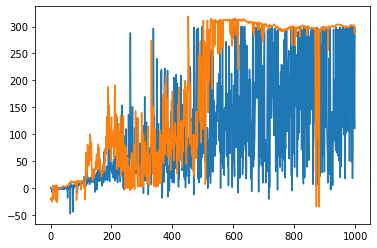

In [2]:
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2


import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  ReLU#,TanH
TanH=tensorflow.keras.layers.Activation('tanh')
Sigmoid=tensorflow.keras.layers.Activation('sigmoid')

n_act=4
n_state=24

class Actor(Model):
  def __init__(self,n_act):
    super(Actor, self).__init__()
    self.d1 = Dense(512, activation='relu')
    self.d2 = Dense(256, activation='relu')
    self.mean = Dense(n_act)
    self.tanh  = TanH
    self.sigmoid  = Sigmoid
    self.std = Dense(n_act)

  def call(self, x):
    
    x = self.d1(x)
    x = self.d2(x)
    #x = self.d3(x)
    #x = self.d4(x)
    mean = self.mean(x)
    mean = self.tanh(mean)
    std = self.std(x)
    std = self.sigmoid(std)
    return mean,std+10e-10


class Critic(Model):
  def __init__(self):
    super(Critic, self).__init__()
    self.d1 = Dense(512, activation='relu')
    self.d2 = Dense(256, activation='relu')
    #self.d3 = Dense(5, activation='relu')
    #self.d4 = Dense(6, activation='relu')
    self.value = Dense(1)
    

  def call(self, x):
    
    x = self.d1(x)
    x = self.d2(x)
    #x = self.d3(x)
    #x = self.d4(x)
    value = self.value(x)
    return value

class ppo_model():
    def __init__(self):
        self._actor=Actor(4)
        self._critic=Critic()
        self._debug = False
        self._actor_opt= Adam(0.001)
        self._critic_opt= Adam(0.001)
        self.value_coef=0.5
        self.entropy_coef=0.01
        self._gamma=0.99
        self._lambda=0.95
        self.clip_epsilon=0.05
        self._advantage=10
        
    def get_advantages(self,values, masks, rewards):
        target_qvals = []
        for i in range(len(rewards)-self._advantage):
            _values=values[i:i+self._advantage+1]
            _rewards=rewards[i:i+self._advantage]
            _masks=masks[i:i+self._advantage]
            gae = 0
            for j in reversed(range(self._advantage)):
                delta = _rewards[j] + self._gamma * _values[j + 1] * _masks[j] - _values[j]
                gae = delta + self._gamma * self._lambda * _masks[j] * gae
            target_qvals.append(gae + _values[0])

        adv = np.array(target_qvals) - values[:-self._advantage-1]
        return target_qvals, (adv - np.mean(adv)) / (np.std(adv) + 1e-10)
    
    def _get_advantages(self,values, masks, rewards):
        target_qvals = []
        gae=0
        for i in reversed(range(len(rewards))):
                delta = rewards[j] + self.gamma * values[j + 1] * masks[j] - values[j]
                gae = delta + self._gamma * self._lambda * masks[j] * gae
        target_qvals.append(gae + _values[0])

        adv = np.array(target_qvals) - values[:-self._advantage-1]
        return target_qvals, (adv - np.mean(adv)) / (np.std(adv) + 1e-10)

    def actor_loss(self,mean,std,old_mean,old_std,old_action,advantage_raw):#, rewards, values):
            old_probs = self.get_log_probs(old_action,old_mean,old_std)
            new_probs = self.get_log_probs(old_action,mean,std)
            entropy_loss = self.get_entropy(std)
            ratio = K.exp(new_probs-old_probs)
            p1 = ratio * advantage_raw
            p2 = K.clip(ratio, min_value=1 - self.clip_epsilon, max_value=1 + self.clip_epsilon) * advantage_raw
            actor_loss = K.mean(K.minimum(p1, p2))
            #critic_loss = 0#K.mean(K.square(rewards - values))
            total_loss =   -actor_loss - self.entropy_coef * entropy_loss #* K.mean(-(new_probs * K.log(new_probs + 1e-10)))
            #tf.print('A',tf.reduce_sum(new_probs),tf.reduce_sum(old_probs),'B',tf.reduce_sum(ratio))
            return total_loss

    @tf.function
    def train_actor(self,curr_states,_old_mean,_old_std,_old_actions,_advantage_raw):
             _advantage_raw=tf.cast(_advantage_raw,tf.float32)
             with tf.GradientTape() as tape:
                  mean,std = self._actor(curr_states, training=True)
                  if self._debug ==True :tf.print('1 : train_actor :',tf.reduce_sum(curr_states),tf.reduce_sum(mean),tf.reduce_sum(std))
                  _act_loss = self.actor_loss(mean,std,_old_mean,_old_std,_old_actions,_advantage_raw)
                  gradients = tape.gradient(_act_loss, self._actor.trainable_variables)
                  self._actor_opt.apply_gradients(zip(gradients, self._actor.trainable_variables))
                  #tf.print('actor grad : ',gradients[0])
             return  _act_loss

    @tf.function          
    def critic_loss(self,_values,_target_rewards):
            batch_size=_values.shape[0]
            critic_loss=self.value_coef*2*tf.reduce_sum(tf.square(_target_rewards-_values))/batch_size
            return critic_loss
        
    @tf.function
    def train_critic(self,_states,_target_rewards):
            with tf.GradientTape() as tape:
                _values=self._critic(_states)
                _values=tf.cast(_values,tf.float32)
                _target_rewards=tf.cast(_target_rewards,tf.float32)
                _critic_loss=self.critic_loss(_values,_target_rewards)
                gradients = tape.gradient(_critic_loss, self._critic.trainable_variables)
                self._critic_opt.apply_gradients(zip(gradients, self._critic.trainable_variables))
                #tf.print('critic grad : ',gradients[0])
            return _critic_loss
    @tf.function
    def get_log_probs(self,_actions,mean,std):
        _actions=tf.cast(_actions,tf.float32)
        mean=tf.cast(mean,tf.float32)
        std=tf.cast(std,tf.float32)
        _var = -0.5*((_actions-mean)/(std))**2
        _coef = 1/(std*tf.sqrt(2*np.pi)) 
        
        _probs = _coef*tf.cast(tf.exp(_var),tf.float32)
        #_probs = tf.abs(_probs+ )
        log_probs = tf.math.log(_probs)
        #if _debug==True:
        #    tf.print('2 : log_prob : _var  ',tf.reduce_sum(_var),tf.reduce_sum(_coef),tf.reduce_sum(_actions))
        #    tf.print('2 : log_prob : _probs',tf.reduce_sum(_probs),tf.reduce_sum(log_probs))
        return log_probs
    def get_entropy(self,std):
        entropy = 0.5 * (tf.math.log(2 * np.pi * std ** 2) + 1)
        return entropy


def get_model_actor_simple(input_dims, output_dims):
    state_input = Input(shape=input_dims)
    old_actions = Input(shape=(1, output_dims,))
    old_probs = Input(shape=(1, output_dims,))
    advantages = Input(shape=(1, 1,))
    rewards = Input(shape=(1, 1,))
    values = Input(shape=(1, 1,))

    # Classification block
    x = Dense(512, activation='relu', name='fc1')(state_input)
    x = Dense(256, activation='relu', name='fc2')(x)
    mean = Dense(n_actions, activation='tanh', name='mean')(x)
    std = Dense(n_actions, activation='sigmoid', name='std')(x)

    model = Model(inputs=[state_input, old_actions, old_probs, advantages, rewards, values],
                  outputs=[mean,std])
    model.compile(optimizer=Adam(lr=1e-4), loss=[ppo_loss(
        old_actions=old_actions,
        old_probs=old_probs,
        advantages=advantages,
        rewards=rewards,
        values=values)])
    # model.summary()
    return model





def get_model_critic_simple(input_dims):
    state_input = Input(shape=input_dims)

    # Classification block
    x = Dense(512, activation='relu', name='fc1')(state_input)
    x = Dense(256, activation='relu', name='fc2')(x)
    out_actions = Dense(1, activation='tanh')(x)

    model = Model(inputs=[state_input], outputs=[out_actions])
    model.compile(optimizer=Adam(lr=1e-4), loss='mse')
    # model.summary()
    return model


def test_reward():
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        state_input = K.expand_dims(state, 0)
        mean,std = _model._actor(state_input)
        act=np.random.normal(mean,std)[0]
        next_state, reward, done, _ = env.step(mean[0])
        if reward == -100:
            reward=-2
        state = next_state
        total_reward += reward
        
    return total_reward
    
image_based = False

env=gym.make('BipedalWalker-v2')
env.seed(seed)
state = env.reset()
state_dims = env.observation_space.shape
n_actions = env.action_space.shape[0]

#tensor_board = TensorBoard(log_dir='./logs')


#model_actor = get_model_actor_simple(input_dims=state_dims, output_dims=n_actions)
#model_critic = get_model_critic_simple(input_dims=state_dims)
_model=ppo_model()
ppo_steps = 2000
target_reached = False
best_reward = 0
iters = 0
episodes = 1000
adv=_model._advantage
rewards_log=[]
max_reward=0
for episode in range(episodes):

    curr_states = []
    old_actions = []
    old_probs =[]
    values = []
    masks = []
    rewards = []
    old_means = []
    old_stds  = []
    state_input = None
    sum_reward=0
    sum_reward_log=0
    for itr in trange(ppo_steps+adv):
        state_input = K.expand_dims(state, 0)
        mean,std = _model._actor(state_input)
        q_value  = _model._critic(state_input)
        action = np.random.normal(mean,std)[0]
        #prob=get_log_probs(action,mean,std)
        observation, reward, done, info = env.step(action)
        if reward == -100:
            reward=-2
        #print('itr: ' + str(itr) + ', action=' + str(action) + ', reward=' + str(reward) + ', q val=' + str(q_value.numpy()))
        mask = not done

        curr_states.append(state)
        old_actions.append(action)
        #old_probs.append(prob)
        old_means.append(mean)
        old_stds.append(std)
        values.append(q_value)
        masks.append(mask)
        rewards.append(reward)
        sum_reward+=reward

        state = observation
        if done:
            sum_reward_log=copy(sum_reward)
            sum_reward=0
            env.reset()
        
    state_input=K.expand_dims(state, 0)
    q_value = _model._critic(state_input)
    values.append(q_value)
    _curr_states=np.array(curr_states).reshape(-1,24)
    _old_actions=np.array(old_actions).reshape(-1,4)
    _old_means=np.array(old_means).reshape(-1,4)
    _old_stds=np.array(old_stds).reshape(-1,4)
    _values=np.array(values).reshape(-1,1)
    _rewards=np.array(rewards).reshape(-1,1)
    _masks  = np.array(masks).reshape(-1,1)
    
    for _ in range(5):
        #for batch in batches:
            _target_qvals, _advantages = _model.get_advantages(_values, _masks, _rewards)
            _model.train_actor(_curr_states[:-adv],_old_means[:-adv],_old_stds[:-adv],_old_actions[:-adv],_advantages)
            _model.train_critic(_curr_states[:-adv],_target_qvals)                            

    avg_reward = np.mean([test_reward() for _ in range(5)])
    print('episode :',episode,'reward :',sum_reward_log)   
    print('total test reward=' + str(avg_reward))
    if avg_reward >=max_reward:
        _model._actor.save_weights('ppo_best_actor.hdf5')
        _model._critic.save_weights('ppo_best_critic'+'.hdf5')
        best_eps=episode
        max_reward = avg_reward
    rewards_log.append([sum_reward_log,avg_reward])
    iters += 1
    env.reset()

env.close()
plt.plot(rewards_log)

In [3]:
#_model._actor.save_weights('ppo-1000.hdf5')
import pickle
f=open('ppo-biped-loss.pkl','wb')
pickle.dump(rewards_log,f)
f.close()

In [4]:
#_model._actor.load_weights('ppo-1000.hdf5')

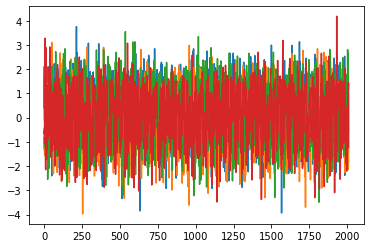

In [5]:
plt.plot(old_actions)

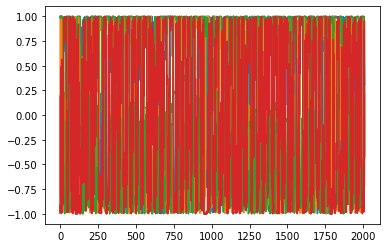

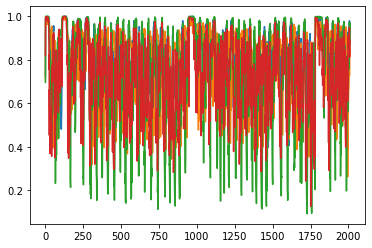

In [6]:
plt.plot(_old_means)
plt.show()
plt.plot(_old_stds)

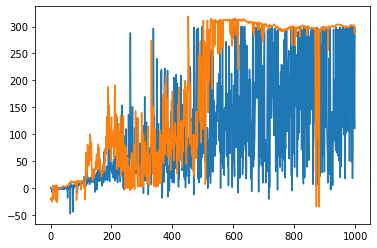

In [7]:
plt.plot(rewards_log)
plt.savefig('bipedal-ppo.png')

In [1]:
import os
os.mkdir('bipedal_ppo')

In [2]:
seed=1
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['PYTHONHASHSEED']=str(seed)
import numpy as np
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense ,Input,concatenate ,Conv2D,Conv2DTranspose,\
MaxPooling2D,AveragePooling2D, LSTM ,Reshape, TimeDistributed,ReLU, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
import warnings
import glob
import math
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import pickle
from collections import deque
from tqdm import tqdm,trange
import gym
from copy import copy , deepcopy
tf.test.is_gpu_available()

n_act=4
n_state=24
TanH=tensorflow.keras.layers.Activation('tanh')
Sigmoid=tensorflow.keras.layers.Activation('sigmoid')

class Actor(Model):
  def __init__(self,n_act):
    super(Actor, self).__init__()
    self.d1 = Dense(512, activation='relu')
    self.d2 = Dense(256, activation='relu')
    self.mean = Dense(n_act)
    self.tanh  = TanH
    self.sigmoid  = Sigmoid
    self.std = Dense(n_act)

  def call(self, x):
    
    x = self.d1(x)
    x = self.d2(x)
    #x = self.d3(x)
    #x = self.d4(x)
    mean = self.mean(x)
    mean = self.tanh(mean)
    std = self.std(x)
    std = self.sigmoid(std)
    return mean,std+10e-10

def test_reward():
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        state_input = K.expand_dims(state, 0)
        mean,std = _model._actor(state_input)
        act=np.random.normal(mean,std)[0]
        next_state, reward, done, _ = env.step(mean[0])
        if reward == -100:
            reward=-2
        state = next_state
        total_reward += reward
        
    return total_reward
_actor=Actor(n_act)
_actor(np.ones((1,24)))
_actor.load_weights('ppo_best_actor.hdf5')
env = gym.make('BipedalWalker-v2')
env.seed(seed)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



[1]

In [3]:
state=env.reset()
i=0
ter_count=0
while True:
    action=_actor(state.reshape(1,24))
    state,rwd,ter,info=env.step(action[0][0])
    img=env.render('rgb_array')
    cv2.imwrite('bipedal_ppo/'+str(i)+'.jpg',img)
    i+=1
    if ter==True:
            ter_count+=1
            state=env.reset()
    if ter_count==5:
             break

In [4]:
env.close()

In [7]:
import gym
env = gym.make('BipedalWalker-v2')
env.reset()
env.step([[1,1,1,1]])
#img=env.render('rgb_array')

TypeError: only size-1 arrays can be converted to Python scalars

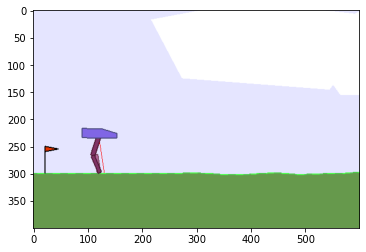

In [4]:
from matplotlib import pyplot as plt
plt.imshow(img)